Description
Background and Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

Objective

To predict whether a liability customer will buy a personal loan or not.
Which variables are most significant.
Which segment of customers should be targeted more.
Data Dictionary
* ID: Customer ID
* Age: Customer’s age in completed years
* Experience: #years of professional experience
* Income: Annual income of the customer (in thousand dollars)
* ZIP Code: Home Address ZIP code.
* Family: the Family size of the customer
* CCAvg: Average spending on credit cards per month (in thousand dollars)
* Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* Mortgage: Value of house mortgage if any. (in thousand dollars)
* Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities_Account: Does the customer have securities account with the bank?
* CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Do customers use internet banking facilities?
* CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)?

### Following steps will be taken for this project: 

  1. Explore the data set, and do necessary checks
  2. Perform EDA
  
         i. Univariate Analysis
         ii. Bivariate Analysis
         iii. Multivariate Analysis
         iv. Observations from EDA
         v. Data Pre-processing         
  3. Logistic Regression
  
         i. Data Selection
         ii. Model selection
         iii. Analysis Model Performance
         iV. Observations of Logictis models
  4. Decision Tree
  
         i. Model design
         ii. Model Performance Analysis
         iii. Observations
  5. Comparison of Model
  
         i. Best of Logistic Vs Decision Tree
         ii. Final Recommendation for the Marketing. 
  6. EDA on misclassified or  incorrectly predicted data. 
   
     
    

### <span style='color:red'> NOTE: This notebook need uszipcode libraries to be installed. already there is pip install script at the zipcode cleansing section and if running on the new workspace make sure run "pip install uszipcode" first and restart the notebook execution </span>

In [1]:
pip install uszipcode 

Note: you may need to restart the kernel to use updated packages.


### Load necessary libraries

In [2]:
import warnings
warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit from the number of displayed columns and rows.
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)

# To build sklearn model
from sklearn.linear_model import LogisticRegression

# To get diferent metric scores
from sklearn import metrics
from sklearn.metrics import f1_score,accuracy_score, recall_score, precision_score, roc_auc_score, roc_curve, confusion_matrix, precision_recall_curve


In [3]:
from uszipcode import SearchEngine ## Import the uszipcode
# will be using the serach engine function as this functions gets the geo information using the zipcode
search = SearchEngine(simple_zipcode=True)

In [4]:
# load the data set

data = pd.read_csv("Loan_Modelling.csv")

In [5]:
df = data.copy()

In [6]:
data.info() ## display information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [7]:
data.describe(include='all')

ID          Age   Experience       Income       ZIPCode  \
count  5000.000000  5000.000000  5000.000000  5000.000000   5000.000000   
mean   2500.500000    45.338400    20.104600    73.774200  93169.257000   
std    1443.520003    11.463166    11.467954    46.033729   1759.455086   
min       1.000000    23.000000    -3.000000     8.000000  90005.000000   
25%    1250.750000    35.000000    10.000000    39.000000  91911.000000   
50%    2500.500000    45.000000    20.000000    64.000000  93437.000000   
75%    3750.250000    55.000000    30.000000    98.000000  94608.000000   
max    5000.000000    67.000000    43.000000   224.000000  96651.000000   

            Family        CCAvg    Education     Mortgage  Personal_Loan  \
count  5000.000000  5000.000000  5000.000000  5000.000000    5000.000000   
mean      2.396400     1.937938     1.881000    56.498800       0.096000   
std       1.147663     1.747659     0.839869   101.713802       0.294621   
min       1.000000     0.000000     1.000000     0.000000       0.000000   
25%       1.000000     0.700000     1.000000     0.000000       0.000000   
50%       2.000000     1.500000     2.000000     0.000000       0.000000   
75%       3.000000     2.500000     3.000000   101.000000       0.000000   
max       4.000000    10.000000     3.000000   635.000000       1.000000   

       Securities_Account  CD_Account       Online   CreditCard  
count         5000.000000  5000.00000  5000.000000  5000.000000  
mean             0.104400     0.06040     0.596800     0.294000  
std              0.305809     0.23825     0.490589     0.455637  
min              0.000000     0.00000     0.000000     0.000000  
25%              0.000000     0.00000     0.000000     0.000000  
50%              0.000000     0.00000     1.000000     0.000000  
75%              0.000000     0.00000     1.000000     1.000000  
max              1.000000     1.00000     1.000000     1.000000

In [8]:
# checking for any null values
data.isnull().values.any()

False

In [9]:
# to get total duplicated records
data.duplicated().sum() 

0

## Observations: 

* Age : In range of 23 - 67, with mean and median are around 45.
* Experience : Maximum value 43 years. where as mean and median are around 20.
* Income : In the range 8k to 224k USD. Mean is 73k USD and median is 64k USD. Seems righly skewed with the max of 224K. 
* Maximum mortgage taken is 635k USD.
* CCAvg: ranges from 1- 10k with mean of 1.9kUSD and median of 1.5k USD
* ZIPCode can be used for geo centric analysis
* Age, Experience, Income, CCAvg and Mortgage looks like a interval variables
* Family & Education has category, hence category variable
* Personal_loan, Securities_account, CD_Account, Online and Credit Card columns are also a category variable but in a binary form

### Targeted column is Personal_loan. 


 ### Futher observations: 
 * Experience column has negative minimum value. So this column value need to processed/cleansed further. Results of data entry error. 
 * Maximum Income and MOrtage are 222K and 645K respective, which needs to be analysed further. 
 * Since there are 5 binary category variables, good to check if all these column has 0 in common. 

*Observation:* Looks like there is no column value with null values and the all the column has some form of the values

In [10]:
# Checking Unique values, since all the columns are in numerical type using nunique() function
# to get the unique values on each column
data.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIPCode                467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal_Loan            2
Securities_Account       2
CD_Account               2
Online                   2
CreditCard               2
dtype: int64

In [11]:
# checkng the caterogy columns 
colums1 = ['Family','Education','Personal_Loan','Securities_Account','CD_Account','Online','CreditCard']
# this for loop is to get teh unique values in the each category and print as an output, and also cross check the total values
for i in colums1:
    print('Unique values in',i, 'are :')
    print(data[i].value_counts())
    a = list(data[i].value_counts())
    val=0
    for i in a:
        val = val+i
    print('Total',val)
    print('*'*50)

Unique values in Family are :
1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64
Total 5000
**************************************************
Unique values in Education are :
1    2096
3    1501
2    1403
Name: Education, dtype: int64
Total 5000
**************************************************
Unique values in Personal_Loan are :
0    4520
1     480
Name: Personal_Loan, dtype: int64
Total 5000
**************************************************
Unique values in Securities_Account are :
0    4478
1     522
Name: Securities_Account, dtype: int64
Total 5000
**************************************************
Unique values in CD_Account are :
0    4698
1     302
Name: CD_Account, dtype: int64
Total 5000
**************************************************
Unique values in Online are :
1    2984
0    2016
Name: Online, dtype: int64
Total 5000
**************************************************
Unique values in CreditCard are :
0    3530
1    1470
Name: CreditCard, dtype: int64

## Observation: 
* From the above outputs, it is clear that all the catergorical variables has clean data. 
* Means the data has either 0 or 1 in case of binary variables and Education & Family has more category. 

## Cleaning Experience Column

### Steps
* Find the data entry rows, since those values are negative in nature it will impact the mean of the data. 
* So best practise is to compare the negative experience profile(age, income) matching to those in the positive income. If the value is present then use it the postive experience in place of negative experience. 
* else, then use the median experience value. 
* I feel this approach is better than just replacing all the negative experience value with median at one shot. 

In [12]:
# from the describe function observe that experience has negative value, 
# so check the negative values in the experience column
data[data['Experience'] <= 0]['Experience'].value_counts()

 0    66
-1    33
-2    15
-3     4
Name: Experience, dtype: int64

Since there are entries with "0" experience we cannot convert all the negative to zero and work on it. So the below steps to be performed

In [13]:
df_negative = data[data['Experience'] < 0] # Creating a new data frame that has negative value experience
df_positive = data[data['Experience'] > 0] # Creating a new data frame that has positive value experience, including zero 
# cuz there will be matching enteries a zero experience too. 
# First loop the negative df, get the age and income, find the matching entry in postive df and assign the value.
# get the list using the id column from df_negative
df_negList = df_negative['ID'].tolist()

for id in df_negList:
   # print(id)
    #age = df_negative[df_negative['ID']==i]["Age"].tolist()[0]
    age = df_negative.loc[df_negative['ID']==id]["Age"].tolist()[0] # just getting the age value using the id from negative df
    Education = df_negative.loc[df_negative['ID']==id]["Education"].tolist()[0]# just getting the age value using the id from negative df
    #now get the matching experience from the df_positive dataframe
    matching_experience = df_positive[(df_positive['Age'] == age) & (df_positive['Education'] == Education)]['Experience']
    if matching_experience.empty:
        exp = round(df_positive['Experience'].median()) #if there is no matching values in the positive df then get median
    else:
        exp = matching_experience.tolist()[0] # set the exp value from the matching value.
    data.loc[data.loc[np.where(data['ID']==id)].index, 'Experience'] = abs(exp)

In [14]:
# to confirm the above function has replaced all the negative value to the matching experience or median value
data[data['Experience'] < 0]['Experience'].count()

0

All the -1,-2,-3 values in the experience column is replaced with the meaning ful values. 

### Making Use of Zip codes

##### Install uszipcode libraries from the repo. 


In [15]:
data['ZIPCode'] = data['ZIPCode'].astype('object')
#reason for converting the ZIPCode to an object is that 
#the search function provided by SearchEngine needs string object as input

In [16]:
# Creating a function that search the zip code from the uszip repo and returns the county. I choose to take county here. 
def zip_county(zipcode):
    #print(zipcode)
    #converted_num = str(zipcode)
    zip_details = search.by_zipcode(zipcode) # returns the geo infomration using the zip code
    if search.by_zipcode(zipcode):
        county = zip_details.county  #getting county field from the return result. 
                                     #getting City will make too many unique cities, hence county
    else:
        county = zipcode
    return county

In [17]:
# Get teh county value and assign to the new column variable
data['County'] = data['ZIPCode'].apply(zip_county)

In [18]:
# getting total number of events based on the county
data['County'].value_counts()

Los Angeles County        1095
San Diego County           568
Santa Clara County         563
Alameda County             500
Orange County              339
San Francisco County       257
San Mateo County           204
Sacramento County          184
Santa Barbara County       154
Yolo County                130
Monterey County            128
Ventura County             114
San Bernardino County      101
Contra Costa County         85
Santa Cruz County           68
Riverside County            56
Marin County                54
Kern County                 54
Solano County               33
San Luis Obispo County      33
Humboldt County             32
Sonoma County               28
Fresno County               26
Placer County               24
92717                       22
Butte County                19
Shasta County               18
El Dorado County            17
Stanislaus County           15
San Benito County           14
San Joaquin County          13
Mendocino County             8
Tuolumne

In [19]:
data.County.nunique()

42

From the above output found four of the zipcodes has not correct zip mapping so change is manually. (Googled the zipcode to get the county details)

* 92717    - Irvine, Orange County                   
* 96651    - San Francisco County                    
* 92634    - Fullerton, Orange County                    
* 93077    - Los Angeles County



In [20]:
# Replacing the wrong county information with the correct info
data.loc[data['County'] == 92717, 'County'] = 'Orange County'
data.loc[data['County'] == 96651, 'County'] = 'San Francisco County'
data.loc[data['County'] == 92634, 'County'] = 'Orange County'
data.loc[data['County'] == 93077, 'County'] = 'Los Angeles County'

In [21]:
data['County'].value_counts()

Los Angeles County        1096
San Diego County           568
Santa Clara County         563
Alameda County             500
Orange County              366
San Francisco County       263
San Mateo County           204
Sacramento County          184
Santa Barbara County       154
Yolo County                130
Monterey County            128
Ventura County             114
San Bernardino County      101
Contra Costa County         85
Santa Cruz County           68
Riverside County            56
Marin County                54
Kern County                 54
Solano County               33
San Luis Obispo County      33
Humboldt County             32
Sonoma County               28
Fresno County               26
Placer County               24
Butte County                19
Shasta County               18
El Dorado County            17
Stanislaus County           15
San Benito County           14
San Joaquin County          13
Mendocino County             8
Tuolumne County              7
Siskiyou

In [22]:
#Getting rid of redudent words to improve memory footprints, so removing the county word from the county name
data.County = data.County.str.replace(' County','')

Regional Segmatation is done with the reference. 
http://calcda.org/regions/california-regions-map/

In [23]:
# Though county is enough for the segmentation, it is nice to segment the data according to the region. 

bay_area  = ["Santa Clara", "Alameda", "San Francisco", "San Mateo", "Contra Costa",
                   "Marin", "Solano", "Sonoma", "Napa"]
central_coast  = ["Santa Barbara", "Monterey", "Ventura", "Santa Cruz", "San Luis Obispo", "San Benito"]
central = ["Fresno", "Kern", "Stanislaus","San Joaquin","Tuolumne","Merced"]
southern = ["Los Angeles","Orange", "Riverside", "San Bernardino"]
far_southern  = ["San Diego", "Imperial"]
northern = ["Sacramento","Yolo","Placer","Humboldt","Butte","Shasta","El Dorado","Mendocino","Siskiyou","Trinity","Lake"]


In [24]:
# Function helps to get the region names using the county name. 
def region_combining(x):
    if x in bay_area:
        return 'bay_area'
    elif x in central_coast:
        return 'central_coast'
    elif x in central:
        return 'central'
    elif x in southern:
        return 'southern'
    elif x in far_southern:
        return 'far_southern'
    elif x in northern:
        return 'northern'
    

In [25]:
#Creating new df column variable region to store region information.
data['Region'] = data['County'].apply(region_combining)

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   object 
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
 14  County              5000 non-null   object 
 15  Region              5000 non-null   object 
dtypes: flo

All the coulumns have values.

In [27]:
#for i in category_col:
#    print('Unique values in',i, 'are :')
#    print(data[i].value_counts())
#    a = list(data[i].value_counts())
#    val=0
#    for i in a:
#        val = val+i
#    print('Total',val)
#    print('*'*50)

# 2. EDA 

## 2.1 Univariate Analysis : Continuous Variables

In [28]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency 
# and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical 
# variable.
# This function takes the numerical column as the input and returns the boxplots 
# and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=T, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

### Univariate Analysis: Age

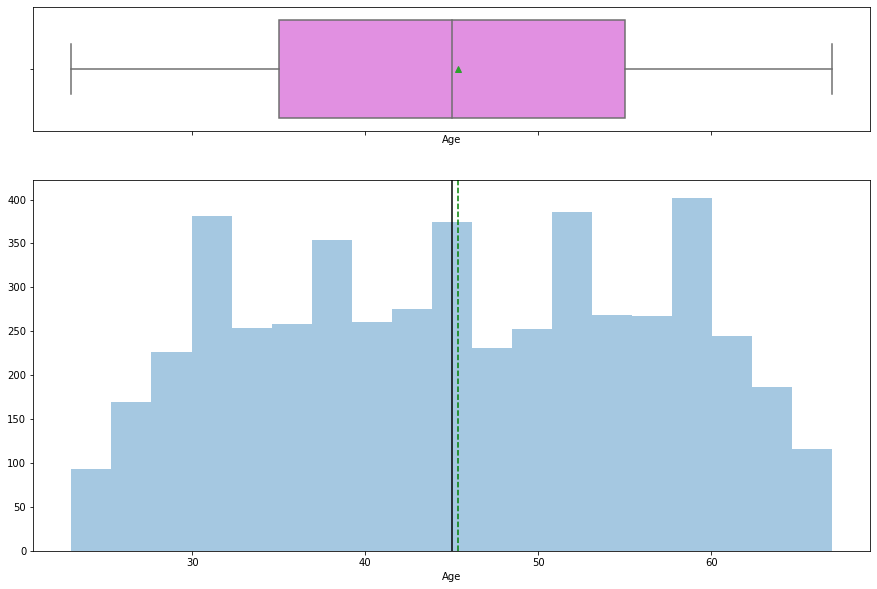

In [29]:
histogram_boxplot(data["Age"])

#### Observation:

* Data based on Age is normally distributed 


### Univariate Analysis: Experience

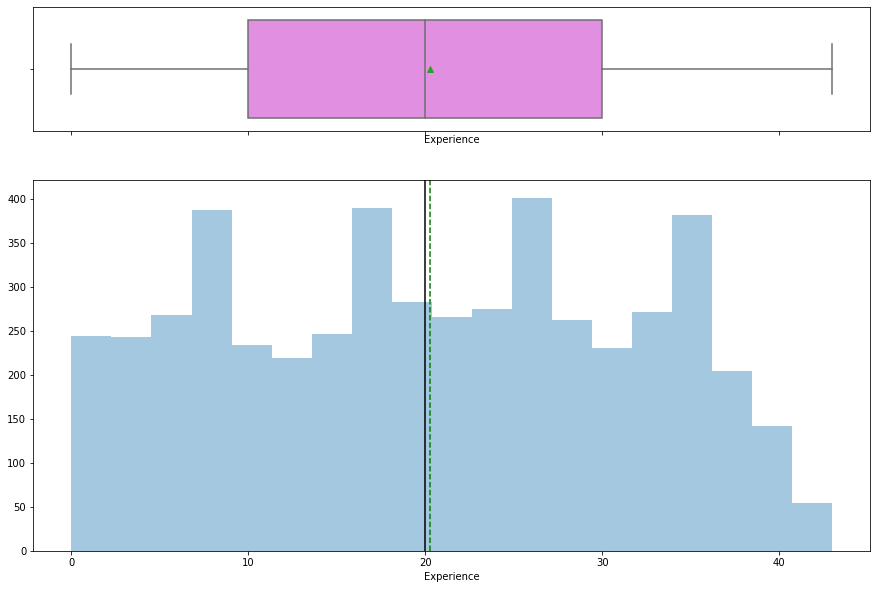

In [30]:
histogram_boxplot(data["Experience"])

#### Observation:

* Data based on Experience is normally distributed 

### Univariate Analysis: Income

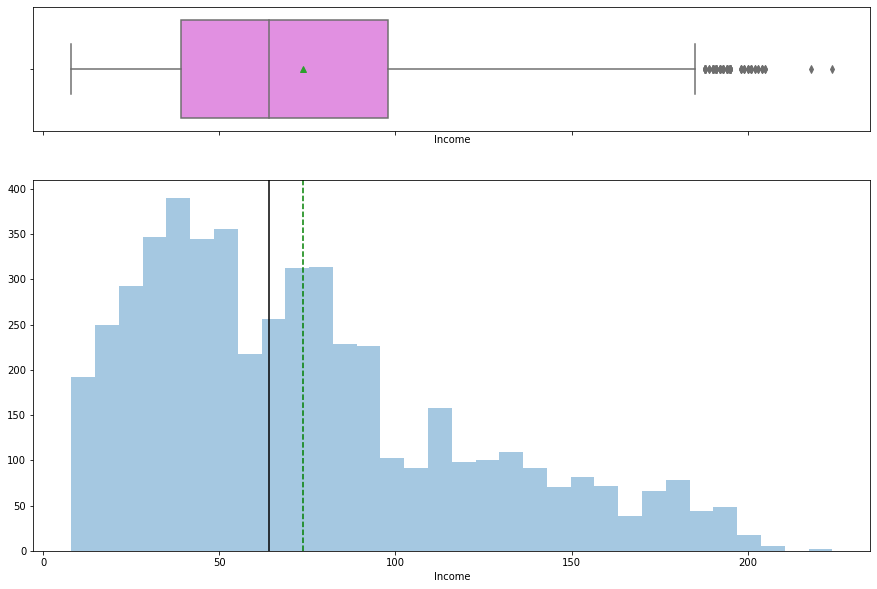

In [31]:
histogram_boxplot(data["Income"])

#### Observation:

* Data based on Income is Right skewed distributed 

### Univariate Analysis: CCAvg

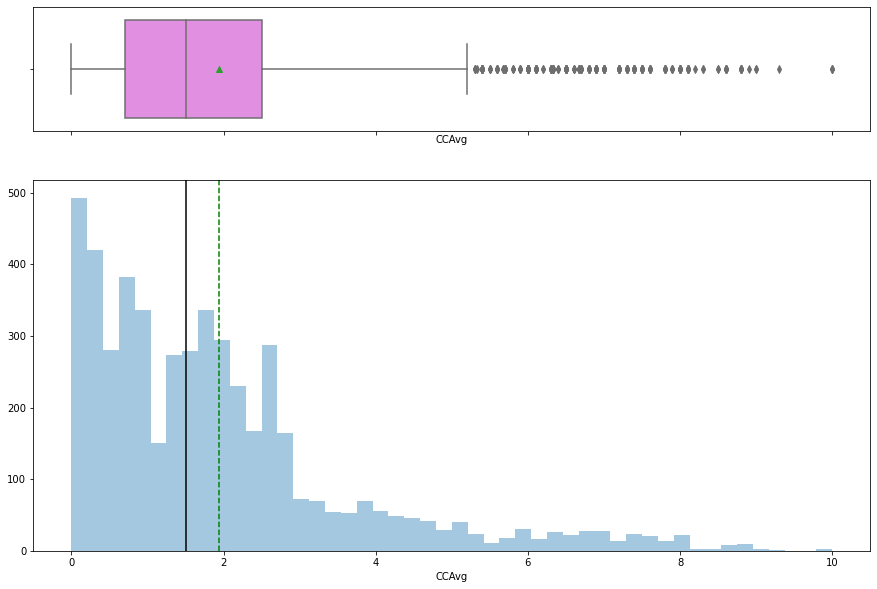

In [32]:
histogram_boxplot(data["CCAvg"])

#### Observation:

* Data based on Credit Card spending is Right skewed distributed with outliers 

### Univariate Analysis: Mortgage

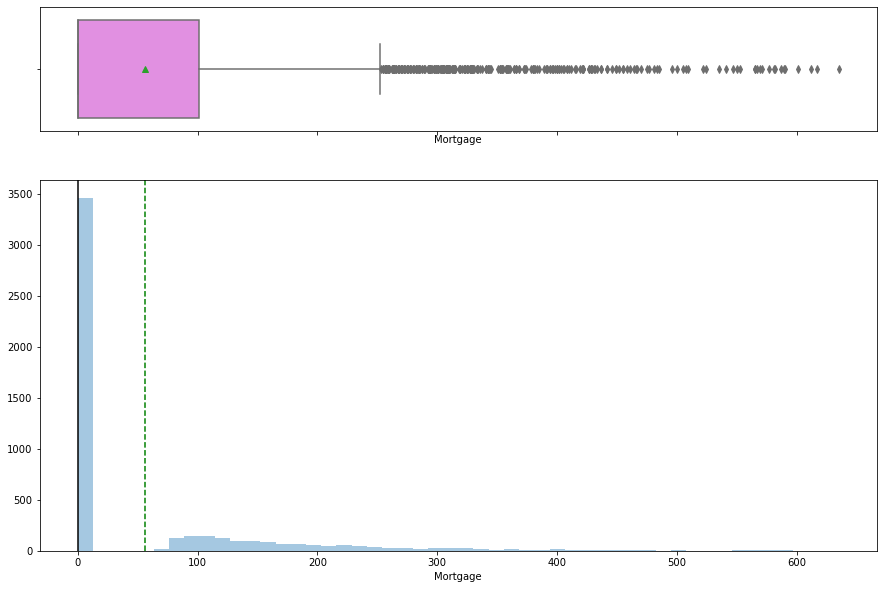

In [33]:
histogram_boxplot(data["Mortgage"])

### Observation:

* Data based on Mortgage is Right skewed distributed with outliers 
* Most of the customers do not have mortgage. There are more customers whose mortgage amount is between  90K to 200K . Very few customers whos mortgage amount is more than 500K

## Univariate Analysis: Categorical Variables

#### Create Bins for Age Income and CCAvg

In [34]:
bins= [20,30,40,50,60,100]
labels = ['20-30','31-40','41-50','51-60','61-100']
data['AgeGroup'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

In [35]:
income_bins= [0, 50, 140, 224]
income_labels = ["Lower", "Middle", "High"]
data['IncomeGroup'] = pd.cut(data['Income'], bins=income_bins, labels=income_labels, right=False)

In [36]:
CCAvg_bins= [0.00000, 0.70000, 2.50000, 10.00000]
CCAvg_labels = ["Low", "Medium", "High"]
data['CCAvgGroup'] = pd.cut(data['CCAvg'], bins=CCAvg_bins, labels=CCAvg_labels, right=False)

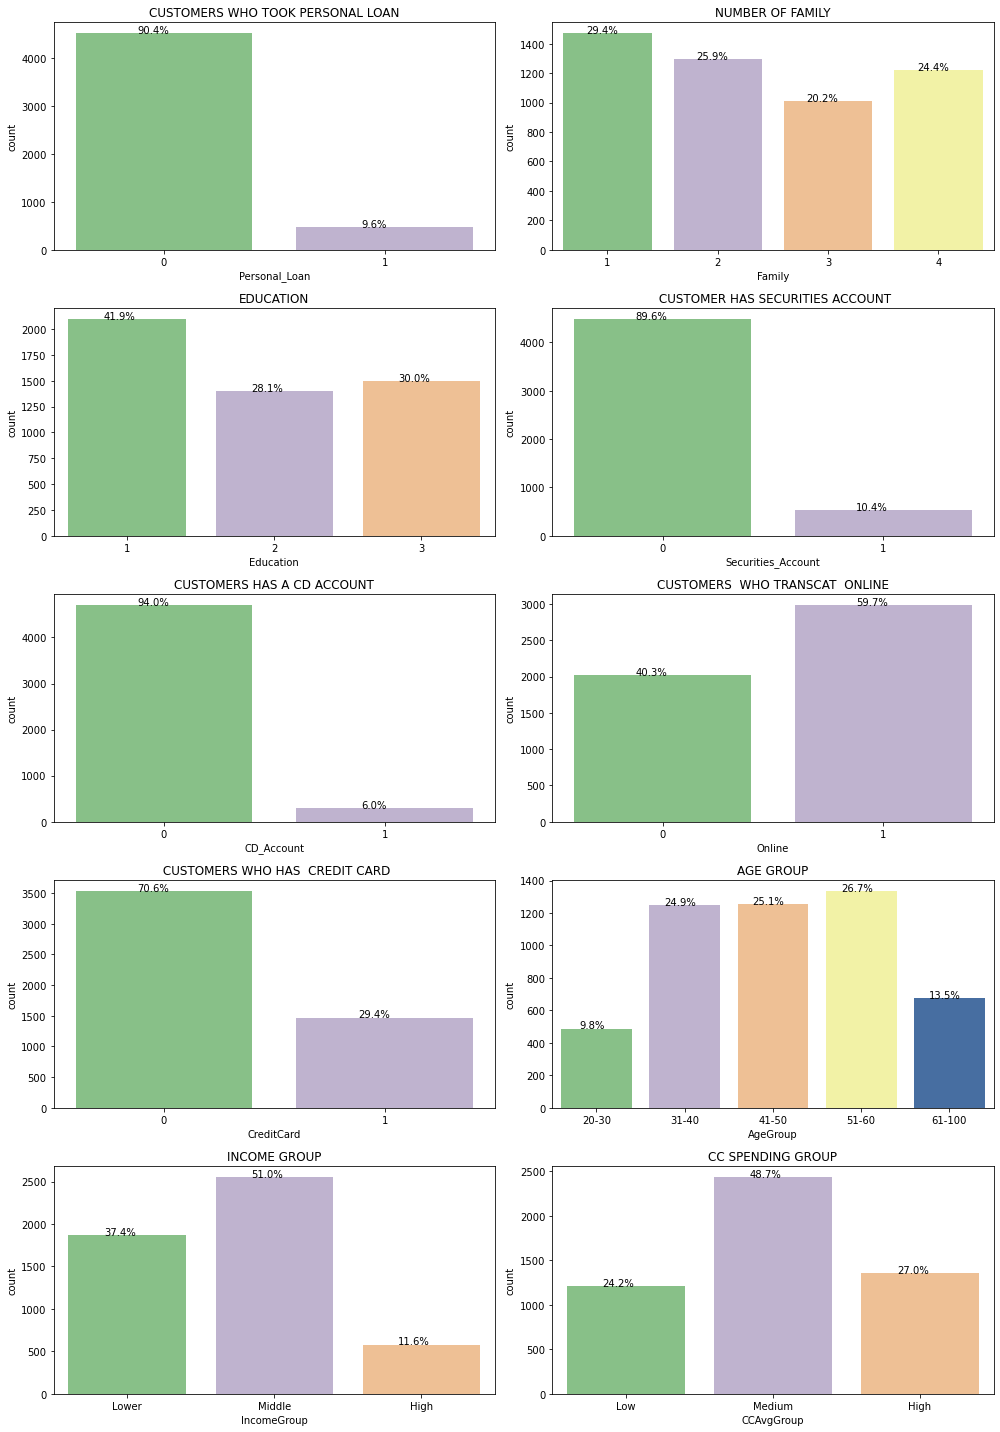

In [37]:
title=['Customers who took Personal Loan','Number of Family','Education',
       ' Customer has Securities Account','Customers has a CD Account',
       'Customers  who transcat  Online',' Customers who has  Credit Card','Age Group',"Income group",'CC Spending group']

cols = data[
    [
        "Personal_Loan",
        "Family",
        "Education",
        "Securities_Account",
        "CD_Account",
        "Online",
        "CreditCard",
        'AgeGroup',
        'IncomeGroup',
        'CCAvgGroup'
    ]
].columns.tolist()
plt.figure(figsize=(14, 20))

for i, variable in enumerate(cols):
    plt.subplot(5, 2, i + 1)
    order = data[variable].value_counts(ascending=False).index   
    ax=sns.countplot(data[variable],palette='Accent')
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/len(data[variable]))
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        plt.annotate(percentage, (x, y),ha='center')
    plt.tight_layout()
    plt.title(title[i].upper())
plt.show()

### Count on each Region

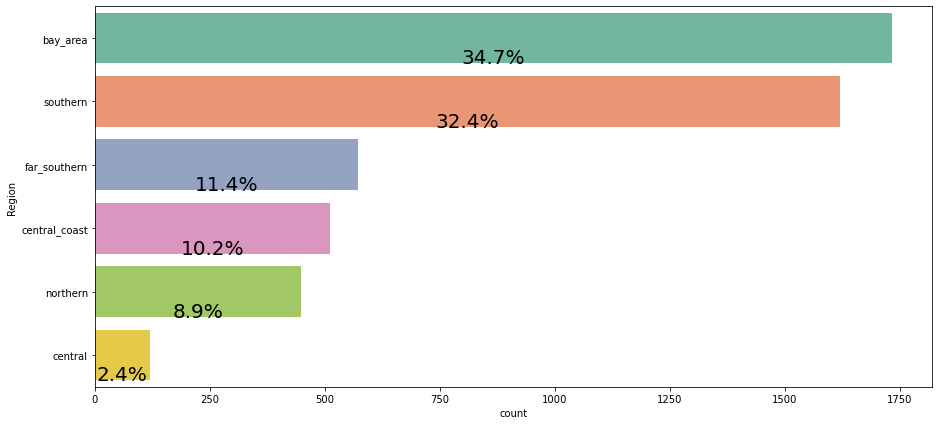

In [38]:
plt.figure(figsize=(15, 7))
ax=sns.countplot(y="Region", data=data, order=data["Region"].value_counts().index, palette='Set2')
total = len(data["Region"])
#print(total)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        #print(percentage)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 20, ha='center')

### Count on each County

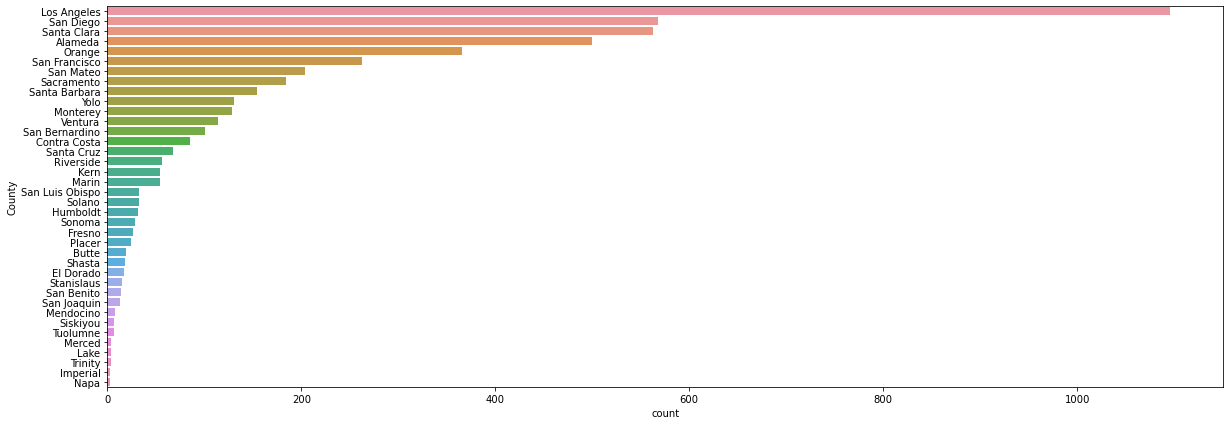

In [39]:
plt.figure(figsize=(20, 7))
sns.countplot(y="County", data=data, order=data["County"].value_counts().index)
total = len(data["County"])
#print(total)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        #print(percentage)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 20, ha='center')

### Observation:

#### Loan
* From the above chart more percent(90.4) of people dont have loan and only 9.6 pct has loan applied. 
* The goal here is to identityfy the customer who can accept the personal loan based on the given features.

#### Family

* Family data is more or less evenly distributed with almost all the category has same amount of people. 
* From this we cannot infer, so we may have to check the impact of family with other date

#### Education

* From the data we could say the data set has 42 % of population are undergraduate. Grad and Adv Profesisonal people amounts 28 & 30 pct respectively. 
* Education variable could have some impact. 

#### Security Deposit account

* Most of the customer dont have Security deposit with the bank

#### Online Account

* Close to 60 pct of the population in the data set has online access to their account. 

#### Credit Card with other bank

* About 1/3rd of population does not have credit card with other bank. 

#### Region & County
* Bank has more customers based in Bay area and Southern region. Around 66% of banks customer base is coming from these two region. 
* LA county alone contributes 1/3rd of the customer base. 

# 2.2 Bivariate Analysis

In [40]:
data.drop(['ID','ZIPCode',],axis=1,inplace=True)

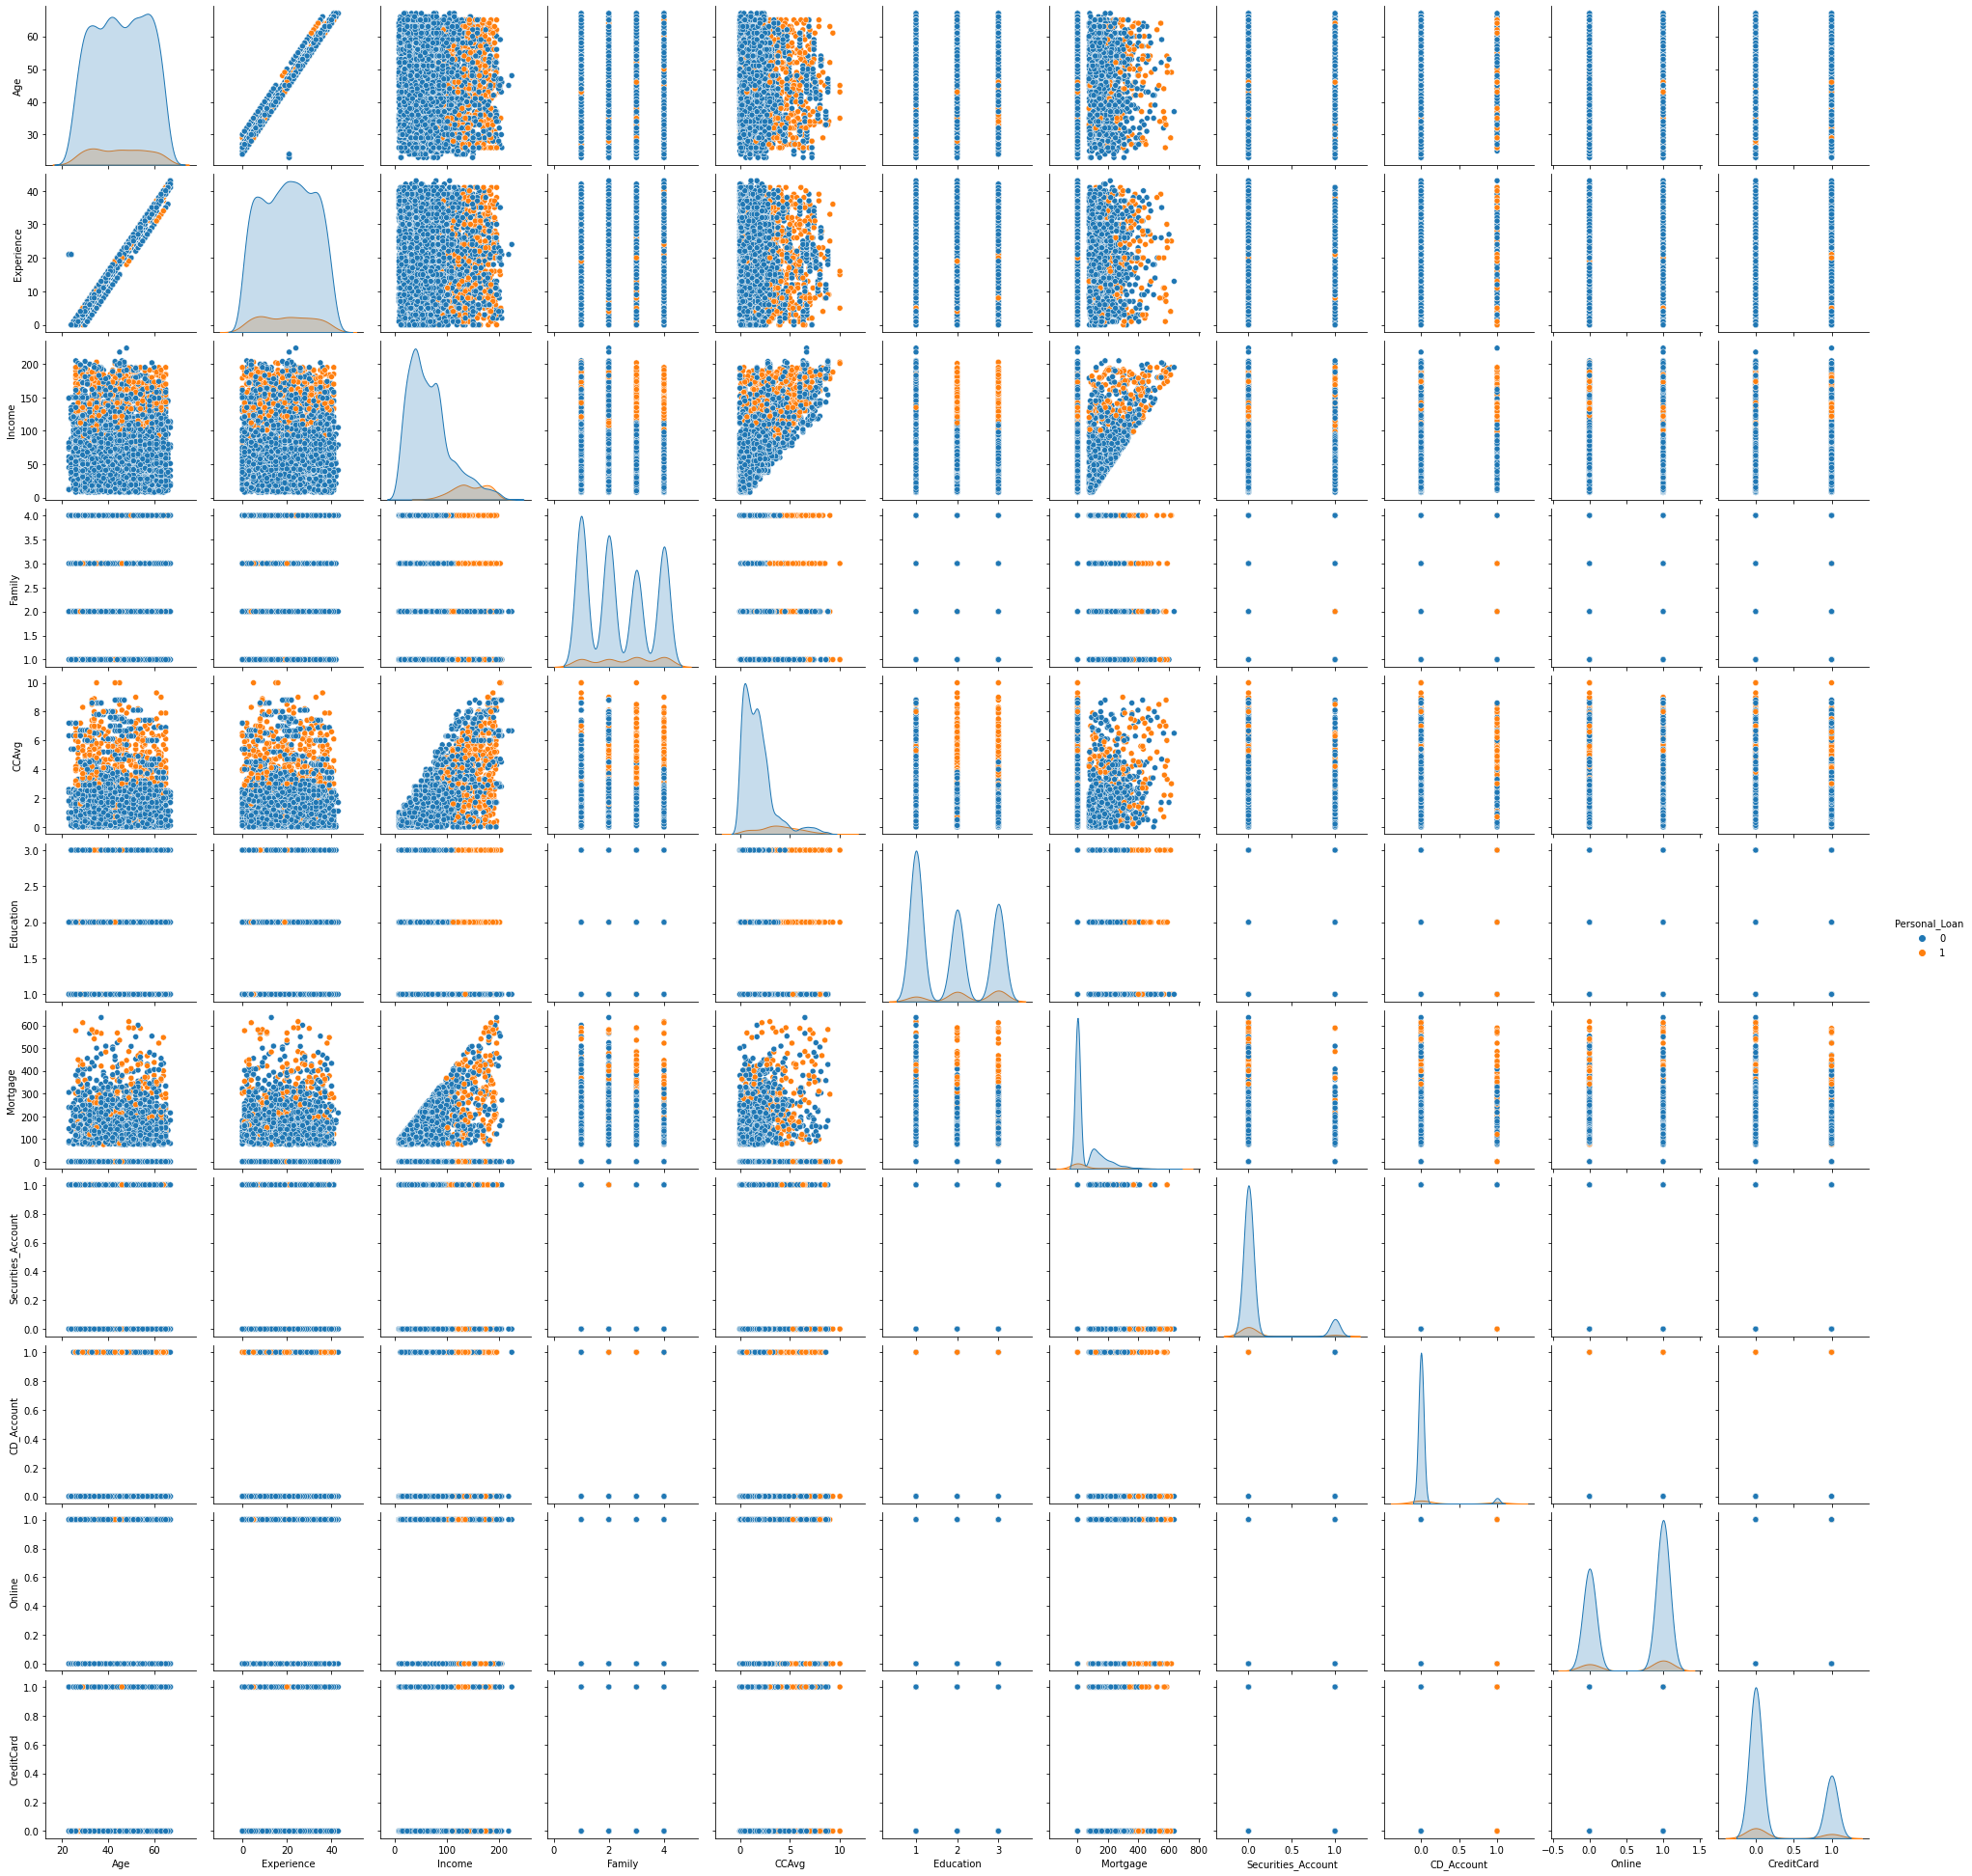

In [41]:
sns.pairplot(data,hue="Personal_Loan")
plt.show()



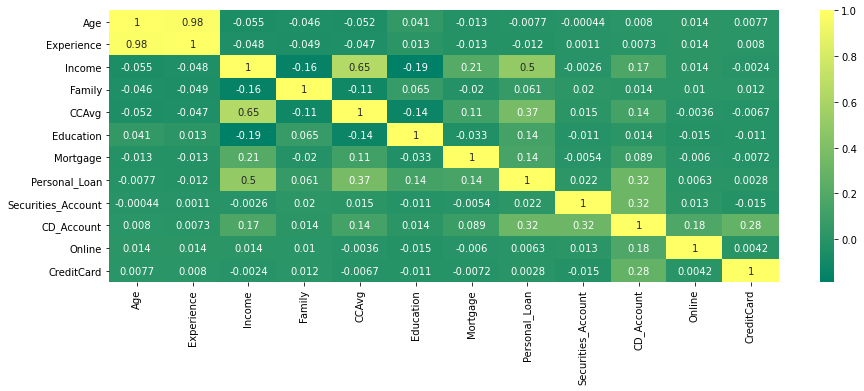

In [42]:
plt.figure(figsize=(15,5))
sns.heatmap(data.corr(),annot=True,cmap="summer")
plt.show()

### Observation: 

* Pairplot information is too hard to infer. so will go ahead with charts. 
* From the heap map we could see only the INcome, CCAvg, and CD account seems to have good correlation with the Personal Loan flag. 
* Age and Experience are tightly correlated, so we can keep just one of these column
* Income has correaltion with CCAvg, Mortgage, Personal Loan, CD account, so this can be found in the multivariate analysis
* CD Account has correaltion with Securities_Account, CC, Online
* Mortgage has decent correlation with Income

In [43]:
# converting categorical varaible to category type. 
# there is not need to convert most of the columns here, as there are already categorised as binary or multiple ( 1,2,3,4)
#category_col = ['Family','Education','Personal_Loan','Securities_Account','CD_Account','Online','CreditCard', 'County','Region']
category_col = ['County','Region']
data[category_col] = data[category_col].astype('category')

### Bivariate Analysis: Continuous Variable Vs Personal Loan

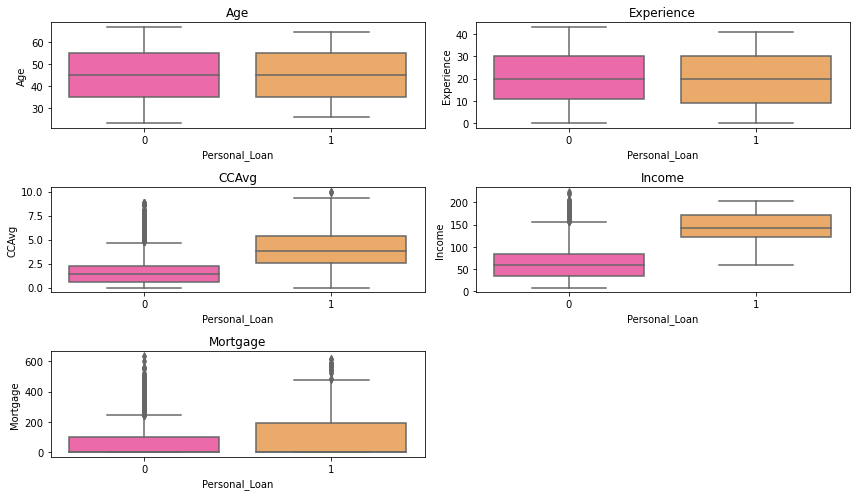

In [44]:
cols = data[
    [
        "Age",
        "Experience",
        "CCAvg",
        "Income",
        "Mortgage"
    ]
].columns.tolist()
plt.figure(figsize=(12, 7))

for i, variable in enumerate(cols):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(data["Personal_Loan"], data[variable], palette="spring")
    plt.tight_layout()
    plt.title(variable)
plt.show()

### Observations:

#### Age vs Loan/ Exp vs Loan
* Box plot of Age vs Loan , Experience vs Loan shows no difference. 
* As seen in the heat map, Age and Experience is tighly correlated. So we keep only one of this column

#### CCAvg vs Loan

* CCAvg Vs Loan data give some idea. 
* Credit Card spending between 3000 - 6000 has Personal Loan. 
* There is people in the CCAvg group between 5000 -6000 whos hasnt bought the loan also. So from this chart we could say, the bank can target the account holders having income between 3000 - 6000

#### Income vs Loan

* Income Vs Loan data give some idea. 
* Income of the people between 125K - 175K has Personal Loan. 
* There are people in the income group between 150K -175K whos hasnt bought the loan also. So from this chart we could say, the bank can target the account holders having income between 125K - 175K

#### Mortgage vs Loan

* People having a mortgage value tend to buy loan

### Bivariate Analysis: Categorical Variables Vs Personal Loan

posx and posy should be finite values
posx and posy should be finite values


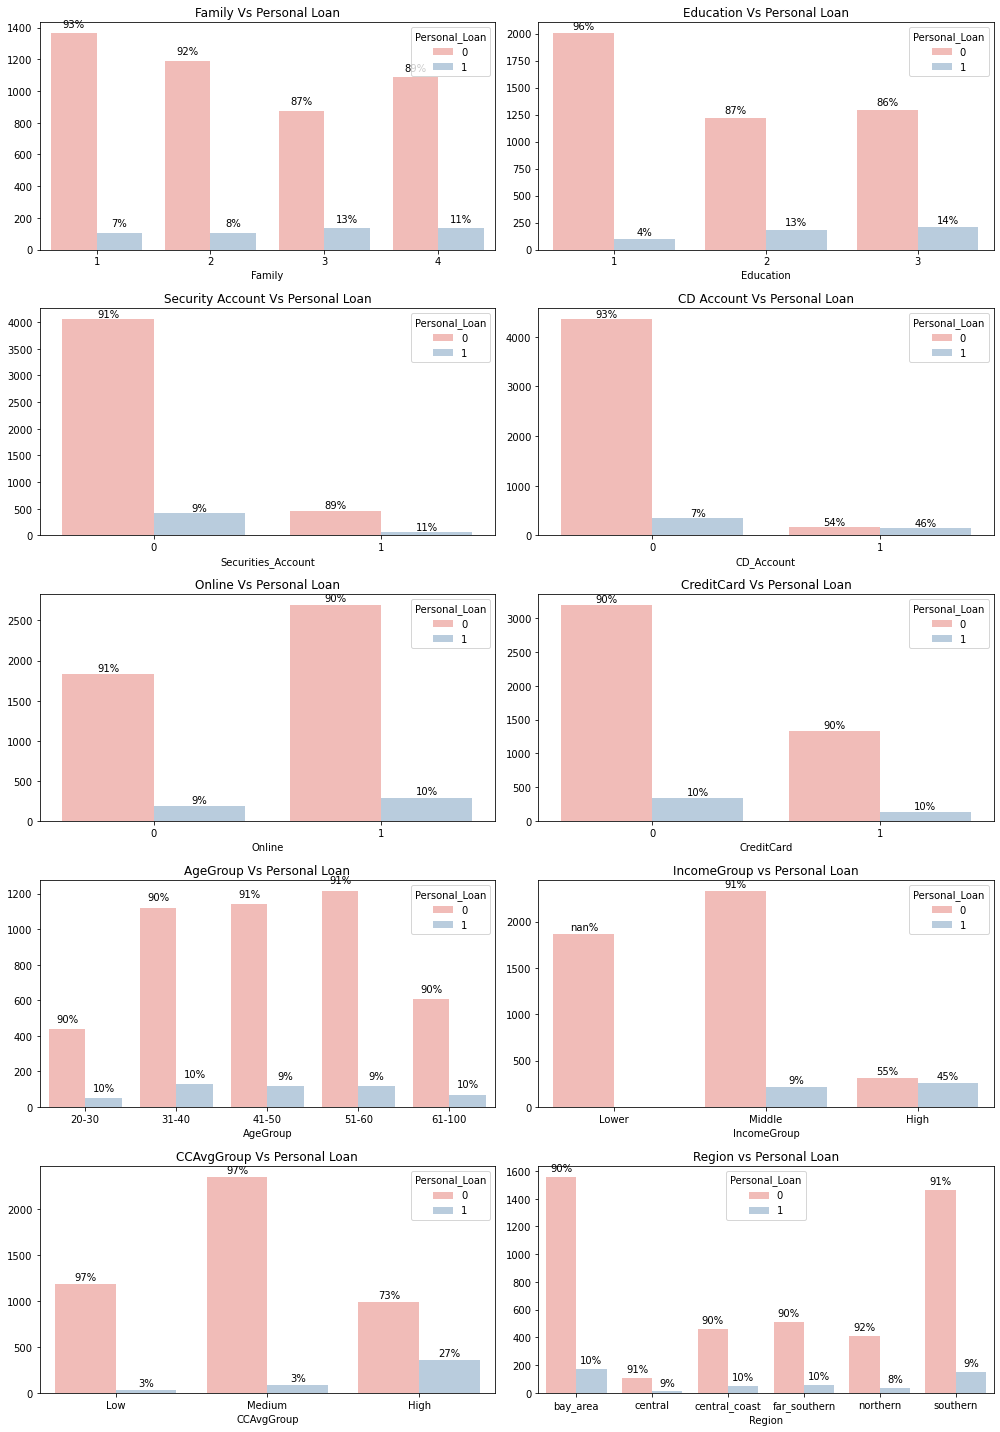

In [45]:
title=['Family Vs Personal Loan','Education Vs Personal Loan','Security Account Vs Personal Loan',
       'CD Account Vs Personal Loan','Online Vs Personal Loan',
       'CreditCard Vs Personal Loan','AgeGroup Vs Personal Loan', 'IncomeGroup vs Personal Loan',
       'CCAvgGroup Vs Personal Loan','Region vs Personal Loan']
cols = data[
    [
        "Family",
        "Education",
        "Securities_Account",
        "CD_Account",
        "Online",
        "CreditCard",
        "AgeGroup",
        "IncomeGroup",
        "CCAvgGroup",
        'Region'
    ]
].columns.tolist()
plt.figure(figsize=(14, 20))

for i, variable in enumerate(cols):
    plt.subplot(5, 2, i + 1)
    ax=sns.countplot(data[variable],hue=data["Personal_Loan"],palette='Pastel1')
    ax.set_ylabel('')
    bars = ax.patches
    half = int(len(bars)/2)
    left_bars = bars[:half]
    right_bars = bars[half:]

    for left, right in zip(left_bars, right_bars):
        height_l = left.get_height()
        height_r = right.get_height()
        total = height_l + height_r

        ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center")
        ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")
    plt.tight_layout()
    plt.title(title[i])
plt.show()

In [46]:
def stacked_plot(x):
    sns.set(palette="nipy_spectral")
    tab1 = pd.crosstab(x, data["Personal_Loan"], margins=True)
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(x, data["Personal_Loan"], normalize="index")
    tab.plot(kind="bar", stacked=True, figsize=(10, 5))
    plt.legend(loc="lower left", frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

Personal_Loan     0    1   All
Region                        
bay_area       1560  173  1733
central         108   11   119
central_coast   461   50   511
far_southern    512   59   571
northern        413   34   447
southern       1466  153  1619
All            4520  480  5000
------------------------------------------------------------------------------------------------------------------------


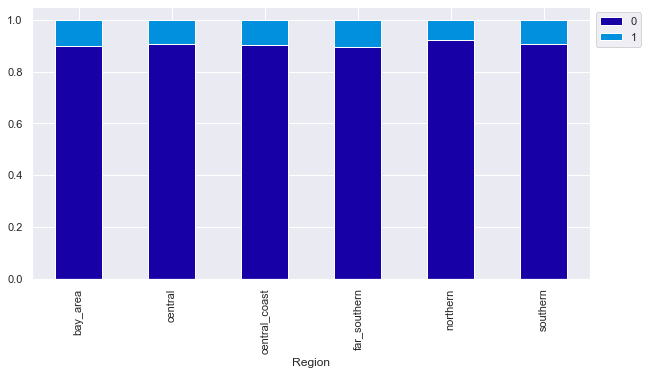

In [47]:
stacked_plot(data["Region"])

### Observation: 

#### Family Size vs Loan

- Not much impact of family size with the loan decision. But there is slight increase of family with 3 or 4 having loans

#### Education vs Loan

- People with Education level of 2 or 3 tend to have bought the loan

#### Securities & CD Accounts Vs Loan

 - People who dont have Securities Account and CD accounts seems to take loan more than those who has. 

#### Online Accoutn Holder vs Loan

 - Online account holder doesn't have much impact but there is slit more people who has online account bought the loan

#### Credit Card with othe bank vs Loan

 - People who does have credit card from other banks tend to have take loan compared to those who has an cc with another bank
    
#### Region

 - Percentage of customers who have purchased with nornmal customer is same across all the region. So from this we can say the region has not much impact on the customer preference. 

# 2.3 MultiVariate Analysis

### CreditCard vs CCAvg vs Personal Loan

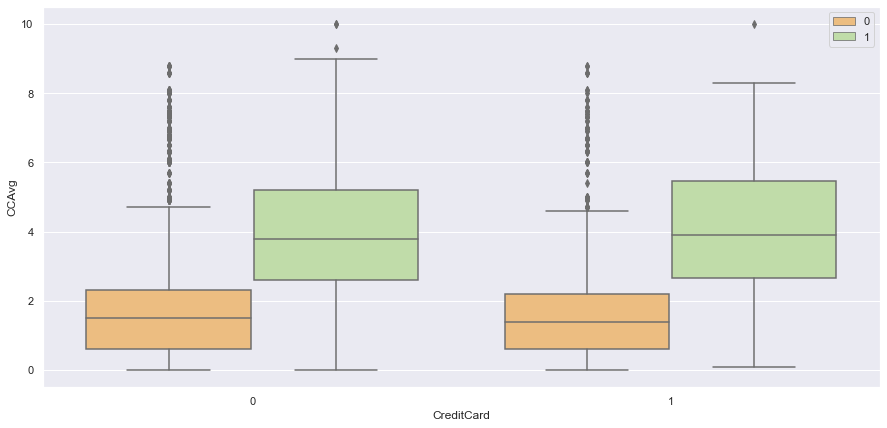

In [48]:
plt.figure(figsize=(15,7))
sns.boxplot(data["CreditCard"],data["CCAvg"],hue=data["Personal_Loan"],palette="Spectral")
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

### Observation:

Customers who have taken personal loan have higher credit card average than those who did not take loan. So high credit card average seems to be good predictor of whether or not a customer will take a personal loan

### Education vs Mortage vs Personal Loan

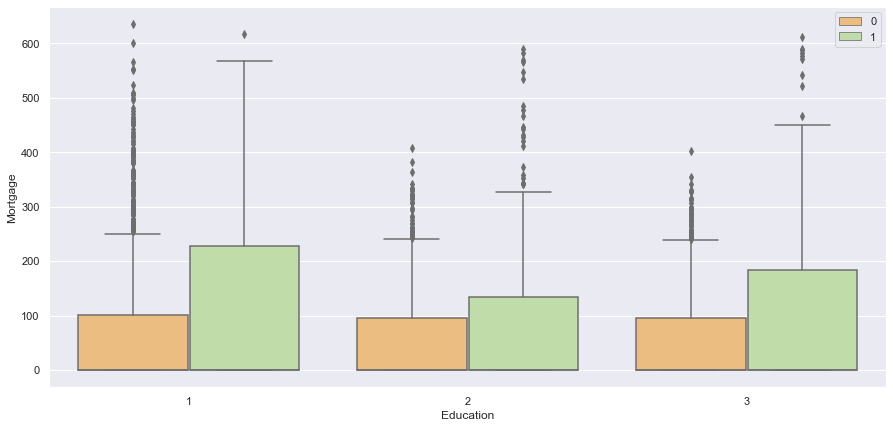

In [49]:
plt.figure(figsize=(15,7))
sns.boxplot(data["Education"],data["Mortgage"],hue=data["Personal_Loan"],palette="Spectral")
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

Undergrad with more mortgage value has bought the loan in the past. THis is higher compared to other education segment

### Family vs Income vs Personal Loan

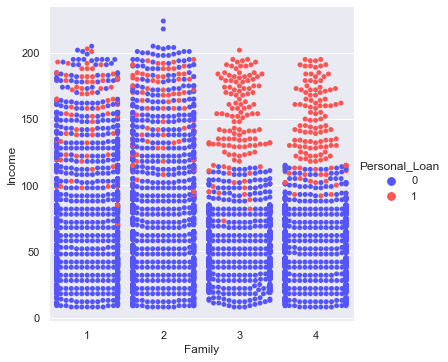

In [50]:
sns.catplot(x='Family', y='Income', hue='Personal_Loan', data = data, kind='swarm',palette='seismic')

Customer in the family size 3 or 4 and in the high income group has bought the loan compared to the other segments

### CD_Account vs Income vs Personal Loan

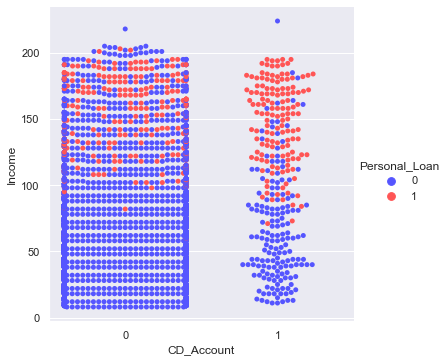

In [51]:
sns.catplot(x='CD_Account', y='Income', hue='Personal_Loan', data = data, kind='swarm', palette='seismic')

Can't tell exactly there is any tight relationship between CD account, Income and Loan. THe chart tells most of the customer segments has no CD accounts

### Education vs Income vs Personal Loan

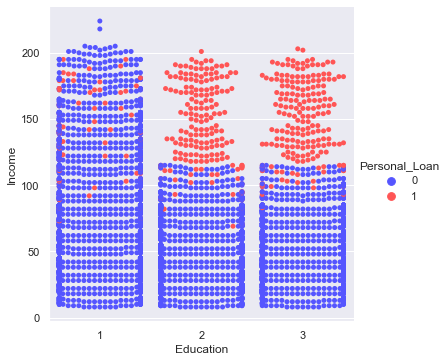

In [52]:
sns.catplot(x='Education', y='Income', hue='Personal_Loan', data = data, kind='swarm', palette='seismic')

Highly education customer in the higher income group has bought the loan in the past

### Family vs Income vs Personal Loan

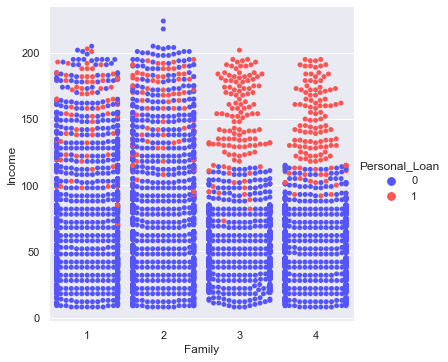

In [53]:
sns.catplot(x='Family', y='Income', hue='Personal_Loan', data = data, kind='swarm',palette='seismic')

### Observation:

Customer who took loan have same income range irrespective of education level. Education of Graduate and above have more chance to take loan.

### AgeGroup vs Income vs Personal Loan

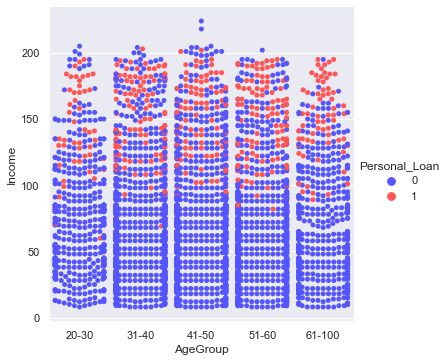

In [54]:
sns.catplot(x='AgeGroup', y='Income', hue='Personal_Loan', data = data, kind='swarm',palette='seismic')

Customer over 30 years and above 100k income group are those customer who take loans

### Region vs Income vs Personal Loan

<Figure size 1080x360 with 0 Axes>

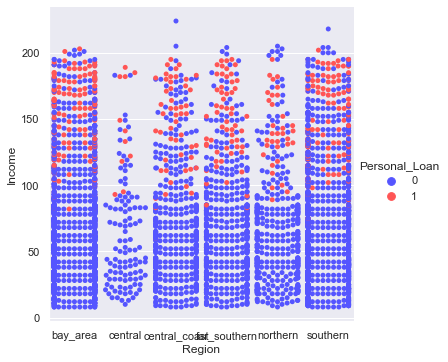

In [55]:
plt.figure(figsize=(15,5))
sns.catplot(x='Region', y='Income', hue='Personal_Loan', data = data, kind='swarm',palette='seismic')

### Income Distribution

Text(0.5, 1.0, 'Income Distribution')

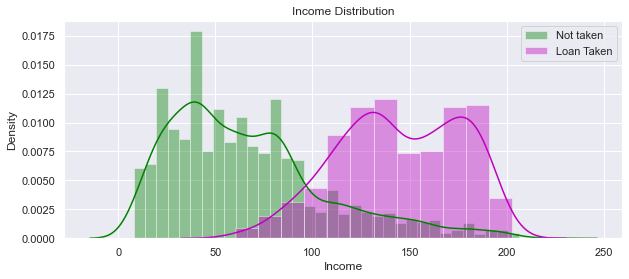

In [56]:
plt.figure(figsize=(10,4))
sns.distplot(data[data["Personal_Loan"] == 0]['Income'], color = 'g',label='Not taken')
sns.distplot(data[data["Personal_Loan"] == 1]['Income'], color = 'm',label='Loan Taken')
plt.legend()
plt.title("Income Distribution")

Customer who has taken loans have high income. So high income seems to be a good indicator that the customer will take loan or not

# 2.4 <a id='link1'>Summary of EDA</a>
**Data Description:**

- There are no duplicates observed in the dataset.
- There are no missing values in the data.
- Dataset contains 5000 rows and 14 columns
- All the columns are **int64**, CCAvg alone in **float64**.
- ID columns is not needed for futher analysis.
- ZIPCode can be used for geo centric analysis
- Age, Experience, Income, CCAvg and Mortgage looks like a interval variables.
- Age has been labeled and grouped as AgeGroup
- Family & Education has category, hence category variable
- Personal_loan, Securities_account, CD_Account, Online and Credit Card columns are also a category variable but in a binary form


**Observations from EDA:**


* `Age`: Is normally distributed where mean and median is almost same. Most of the customer age is between 25 to 65 years

* `Experience` : Is normally distributed and its mean & median also almost same. Experience and Age have strong correlation. 

* `Income` : Income is positively skewed and i have some outlier. Based on the EDA, customer having higher income takes personal loan. So it is safe to say high income is a good indicator that the customer will take the loan or not. 

* `CCAvg` : Is positively skewed, and most of the customers average monthly spending is between 1k to 9k. CCAvg also tell, that the higher the CCAvg, the customer takes the loan

* `Mortgage`: Mortgage is also positively skewed. Majority of the customers have a mortage of less than 40K and the customers who has more mortage has taken personal loan. 

* `Family`: Family data is more or less evenly distributed with almost all the category has same amount of people. Not much impact of family size with the loan decision. Family with 3 or 4 members in the high income group has taken the loans.

* `Education`: From the data we could say the data set has 42 % of population are undergraduate. Grad and Adv Profesisonal people amounts 28 & 30 pct respectively. People with Education level of 2 or 3 tend to have bought the loan. However, Undegraduate Customer who has more mortage has taken loan, compared to other category. 

* `Region `: Looks Bay Area and Southern regions have more high income group of customers, and that tells why these two region accounts for more perctage of people taken loan

**From the data we can observe, Who has taken loan from the bank?**

* Higher income group of the customer
* Customer having child/ or 3-4 members in the family
* Customer having more spending on credit card(CCAvg). 
* Customer having high mortage
* Most of the customers who has taken loan with the bank are coming from southern, bay area and central coast area.
* Customer who has taken loan have utilized online facilties. But this doesnt tell online facilites influence the customer decision to buy a loan or not. 

This observation will give some idea who could be the target customers, which we will be confirm by using classification algorithms. 

Based on EDA, the customer can be segmented into three groups: 

- **Hight Profile** : Higher Income, Advanced education ( Gradudate & Profesional Grad), 3 or 4 member Family, High CC spending

- **Medium Profile**: Medium Income, Gradudate level education, 3/4 member family, moderate CC spending

- **Low Profile**: Lower income, Under grad level education, 3/4 member family, low CC spending. 



# 2.5 Data Pre-Processing

* Dropping ID, ZIPCode and Experience ( already done above)
* There are many outliers in the data which we will treat (perform capping of outliers).
* All the values smaller than the lower whisker will be assigned the value of the lower whisker, and all the values above the upper whisker will be assigned the value of the upper whisker.

**Dropping ID, ZIPCode and Experience**

In [57]:
data.drop(['Experience','County','AgeGroup','IncomeGroup','CCAvgGroup'],axis=1,inplace=True)

**Outliers detection using boxplot**

* CCAvg and Mortgage have upper outliers. 
* INcome has lower outliers. 


In [58]:
data_continous = data[['Income','Mortgage','CCAvg']]

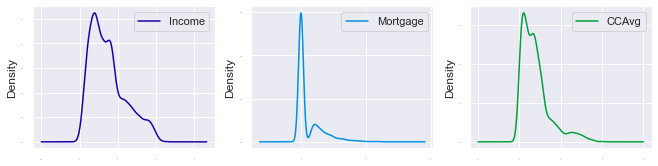

In [59]:
#Density Plot
data_continous.plot(kind='density', subplots=True, layout=(4,4), sharex=False, legend=True, fontsize=1, figsize=(15,12))
plt.show()

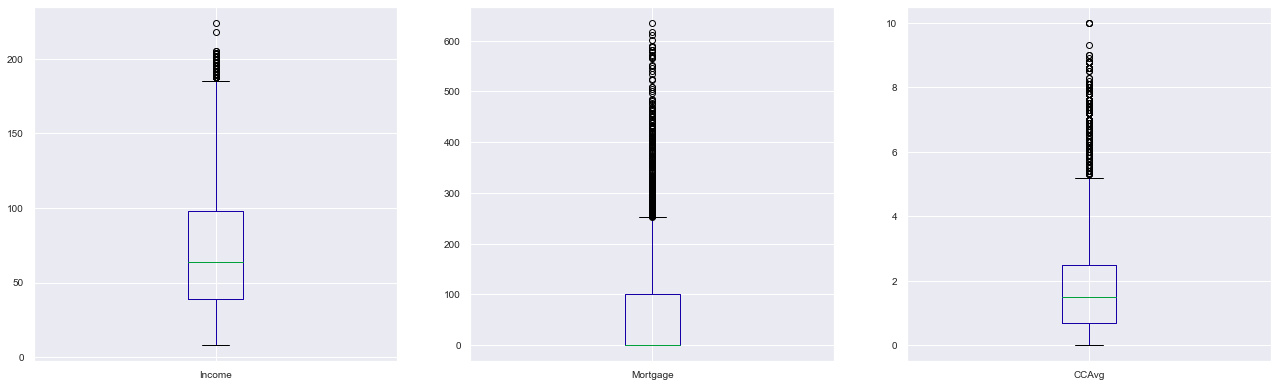

In [60]:
#Box_Plot
data_continous.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False,
fontsize=10, figsize = (30, 30))
plt.show()

In [61]:
def treat_outliers(data,col):
    '''
    treats outliers in a varaible
    col: str, name of the numerical varaible
    data: data frame
    col: name of the column
    '''
    Q1=data[col].quantile(0.25) # 25th quantile
    Q3=data[col].quantile(0.75)  # 75th quantile
    IQR=Q3-Q1
    Lower_Whisker = Q1 - 1.5*IQR 
    Upper_Whisker = Q3 + 1.5*IQR
    data[col] = np.clip(data[col], Lower_Whisker, Upper_Whisker) # all the values smaller than Lower_Whisker will be assigned value of Lower_whisker 
                                                            # and all the values above upper_whisker will be assigned value of upper_Whisker 
    return data

def treat_outliers_all(data, col_list):
    '''
    treat outlier in all numerical varaibles
    col_list: list of numerical varaibles
    data: data frame
    '''
    for c in col_list:
        data = treat_outliers(data,c)
        
    return data

In [62]:
data = treat_outliers_all(data,data_continous)

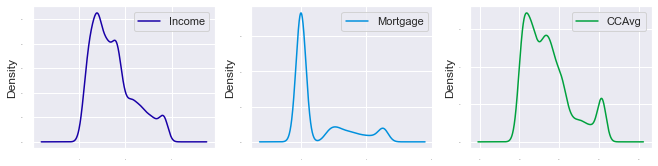

In [63]:
#Density Plot
data_continous = data[['Income','Mortgage','CCAvg']]
data_continous.plot(kind='density', subplots=True, layout=(4,4), sharex=False, legend=True, fontsize=1, figsize=(15,12))
plt.show()

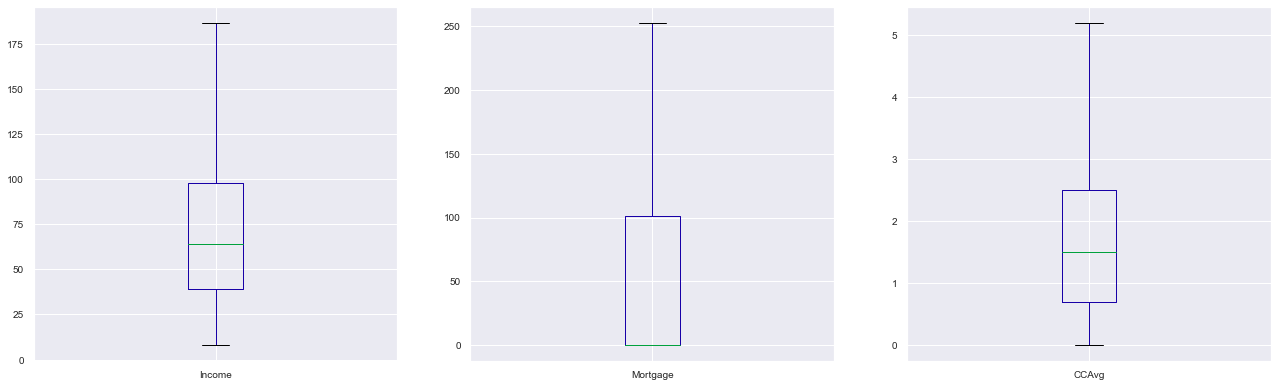

In [64]:
#Box_Plot
data_continous.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False,
fontsize=10, figsize = (30, 30))
plt.show()

In [65]:
data.shape

(5000, 12)

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Income              5000 non-null   float64 
 2   Family              5000 non-null   int64   
 3   CCAvg               5000 non-null   float64 
 4   Education           5000 non-null   int64   
 5   Mortgage            5000 non-null   float64 
 6   Personal_Loan       5000 non-null   int64   
 7   Securities_Account  5000 non-null   int64   
 8   CD_Account          5000 non-null   int64   
 9   Online              5000 non-null   int64   
 10  CreditCard          5000 non-null   int64   
 11  Region              5000 non-null   category
dtypes: category(1), float64(3), int64(8)
memory usage: 434.9 KB


### Data Preparation

**Creating training and test sets.**

In [67]:

## This code snippet is not needed as the convertion is handled earlier section. 
# converting categorical varaible to category type
#category_col = ['Family', 'Education','Personal_Loan', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'Region']
#data[category_col] = data[category_col].astype('category')

In [68]:
ind_vars = data.drop(['Personal_Loan'], axis=1)
dep_var = data['Personal_Loan']

dummycol = ['Family', 'Education', 'Region']
#X = pd.get_dummies(X,drop_first=True)
def encode_cat_vars(x):
    x = pd.get_dummies(
        x,
        columns=dummycol,
        drop_first=True,
    )
    return x


ind_vars_num = encode_cat_vars(ind_vars)
ind_vars_num.head()
#Splitting data in train and test sets
#X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.30, random_state = 1)

Age  Income  CCAvg  Mortgage  Securities_Account  CD_Account  Online  \
0   25    49.0    1.6       0.0                   1           0       0   
1   45    34.0    1.5       0.0                   1           0       0   
2   39    11.0    1.0       0.0                   0           0       0   
3   35   100.0    2.7       0.0                   0           0       0   
4   35    45.0    1.0       0.0                   0           0       0   

   CreditCard  Family_2  Family_3  Family_4  Education_2  Education_3  \
0           0         0         0         1            0            0   
1           0         0         1         0            0            0   
2           0         0         0         0            0            0   
3           0         0         0         0            1            0   
4           1         0         0         1            1            0   

   Region_central  Region_central_coast  Region_far_southern  Region_northern  \
0               0                     0                    0                0   
1               0                     0                    0                0   
2               0                     0                    0                0   
3               0                     0                    0                0   
4               0                     0                    0                0   

   Region_southern  
0                1  
1                1  
2                0  
3                0  
4                1

In [69]:
ind_vars_num.shape

(5000, 18)

## Split the data into train and test


In [70]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    ind_vars_num, dep_var, test_size=0.3, random_state=1
)

In [71]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in train data =", x_test.shape[0])

Number of rows in train data = 3500
Number of rows in train data = 1500


In [72]:
print('Percentage of classes in training set:\n',y_train.value_counts(normalize=True))
print('Percentage of classes in test set:\n',y_test.value_counts(normalize=True))

Percentage of classes in training set:
 0    0.905429
1    0.094571
Name: Personal_Loan, dtype: float64
Percentage of classes in test set:
 0    0.900667
1    0.099333
Name: Personal_Loan, dtype: float64


# Model Selection Criteria & Insights

- **True Positives:**
    - Reality: A customer made a purchase.
    - Model predicted: The customer will contribute to revenue.
    - Outcome: The model is good.

- **True Negatives:**
    - Reality: A customer did NOT make a purchase.
    - Model predicted: The customer will NOT contribute to revenue.
    - Outcome: The business is unaffected.

- **False Positives:**
    - Reality: A customer did NOT make a purchase.
    - Model predicted: The customer will contribute to revenue.
    - Outcome: The team which is targeting the potential customers will be wasting their resources on the people/customers who will not be contributing to the revenue.

- **False Negatives:**
    - Reality: A customer made a purchase.
    - Model predicted: The customer will NOT contribute to revenue.
    - Outcome: The potential customer is missed by the sales/marketing team, the team could have offered the potential customer some discount or loyalty card to make the customer come again to purchase. (Customer retention will get affected.)
    
    
So in case of AllLife Bank, the focus should be on bringing in the False Negative values. The model that has better recall and accuracy will be choosen as the best model

## 3. Logistic Regression

In [73]:
# Funtion that calculates the necessary metrics for the model evaluation
def get_metrics_score(model,train,test,train_y,test_y,threshold=0.5,flag=True,roc=False):
    '''
    Function to calculate different metric scores of the model - Accuracy, Recall, Precision, and F1 score
    model: classifier to predict values of X
    train, test: Independent features
    train_y,test_y: Dependent variable
    threshold: thresold for classifiying the observation as 1
    flag: If the flag is set to True then only the print statements showing different will be displayed. The default value is set to True.
    roc: If the roc is set to True then only roc score will be displayed. The default value is set to False.
    '''
    # defining an empty list to store train and test results
    
    score_list=[] 
    
    pred_train = (model.predict_proba(train)[:,1]>threshold)
    pred_test = (model.predict_proba(test)[:,1]>threshold)

    pred_train = np.round(pred_train)
    pred_test = np.round(pred_test)
    
    train_acc = accuracy_score(pred_train,train_y)
    test_acc = accuracy_score(pred_test,test_y)
    
    train_recall = recall_score(train_y,pred_train)
    test_recall = recall_score(test_y,pred_test)
    
    train_precision = precision_score(train_y,pred_train)
    test_precision = precision_score(test_y,pred_test)
    
    train_f1 = f1_score(train_y,pred_train)
    test_f1 = f1_score(test_y,pred_test)
    
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision,train_f1,test_f1))
        
    
    if flag == True: 
        print("Accuracy on training set : ",accuracy_score(pred_train,train_y))
        print("Accuracy on test set : ",accuracy_score(pred_test,test_y))
        print("Recall on training set : ",recall_score(train_y,pred_train))
        print("Recall on test set : ",recall_score(test_y,pred_test))
        print("Precision on training set : ",precision_score(train_y,pred_train))
        print("Precision on test set : ",precision_score(test_y,pred_test))
        print("F1 on training set : ",f1_score(train_y,pred_train))
        print("F1 on test set : ",f1_score(test_y,pred_test))
   
    if roc == True:
        pred_train_prob = model.predict_proba(train)[:,1]
        pred_test_prob = model.predict_proba(test)[:,1]
        print("ROC-AUC Score on training set : ",roc_auc_score(train_y,pred_train))
        print("ROC-AUC Score on test set : ",roc_auc_score(test_y,pred_test))
    
    return score_list # returning the list with train and test scores

In [74]:
# this function wil be used in both logistic and decision tree classifications model evaluations
def make_confusion_matrix(y_actual,y_predict):
    '''
    model : classifier to predict values of X
    test_X: test set
    y_actual : ground truth  
    
    '''
    #y_predict = model.predict(test_X)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[1,0])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Yes(1)","No(0)"]],
                  columns = [i for i in ['Yes(1)','No(0)']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
      
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='',cmap="YlGnBu")
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

Accuracy on training set :  0.9668571428571429
Accuracy on test set :  0.958
Recall on training set :  0.716012084592145
Recall on test set :  0.6308724832214765
Precision on training set :  0.915057915057915
Precision on test set :  0.9215686274509803
F1 on training set :  0.8033898305084746
F1 on test set :  0.7490039840637449
ROC-AUC Score on training set :  0.8545349157577322
ROC-AUC Score on test set :  0.8124754718105902


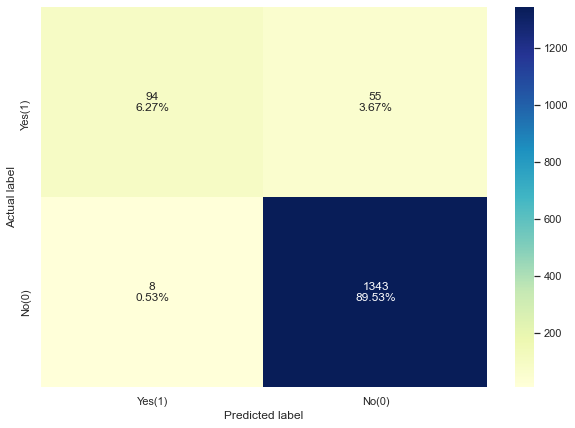

In [75]:
# There are different solvers available in Sklearn logistic regression
# The newton-cg solver is faster for high-dimensional data

lg = LogisticRegression(solver='newton-cg',random_state=1)
model  = lg.fit(x_train,y_train)

# checking model performances for this model
scores_LR = get_metrics_score(model,x_train,x_test,y_train,y_test,roc=True)


y_predict = model.predict(x_test)
# creating confusion matrix
make_confusion_matrix(y_test,y_predict)


### Model Statistics

Though the accuracy of the model is best 95% and 96 % on Test and Train data. The data is imbalanced, so in this case we cannot rely only accurancy of the model. 

#### Crunching the Confusion Matrix numbers:

#### 1. True Positive: 

- 94 (6.27%) Model predicated correctly, and customer also actually want to take loan. 

#### 2. True Negative: 

- Customer don't want loan and model also predicted the customers wont buy loan. There is no impact to the business. 

#### 3. False Negative: 

- Model Predicted the customers wont buy loan, but in reality those customers buy/bought the loan. This metrics in important for this marketing campaign. Since false negative means loss of potential customer buying the loan, which means loss of revenue to the bank. 

#### 4. False Positives: 

- Model predicted the customer will buy the loan but actually they werent. There is not much impact to the business revenue in this case. But there will be some effort put by the marketing team to reachout these customers. Could turn out to be waste of the resources.


#### For the given scenario, the metrics to focus here is <span style='color:green'>accuracy of the model </span> and the <span style='color:green'> False Negative</span>, which is  <span style='color:green'>Recall</span>. 
##### So we will improve the Recall metrics in the following steps and choose which model yeilds the  <span style='color:green'>best recall rate (reduce the number of False Negatives)</span>

Recall for the above default logistic regression is 68% on test data and 71% for Train data. This percentage is not soo good and also the False Negative has 55 prediction. So find out the model which give more recall score and less False Negative value. 



### ROC - AUC on Training Set

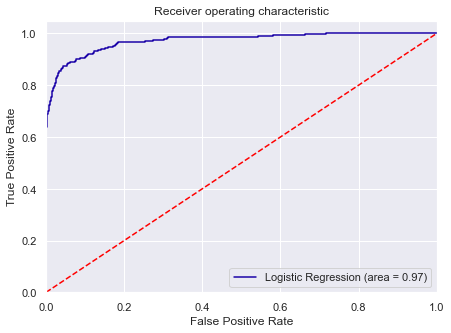

In [76]:
logit_roc_auc_train = roc_auc_score(y_train, lg.predict_proba(x_train)[:,1])
fpr, tpr, thresholds = roc_curve(y_train, lg.predict_proba(x_train)[:,1])
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc_train)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

### ROC-AUC on test set

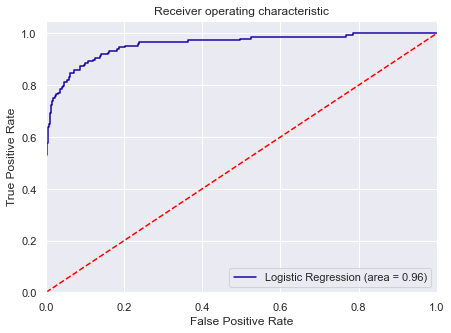

In [77]:
logit_roc_auc_test = roc_auc_score(y_test, lg.predict_proba(x_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, lg.predict_proba(x_test)[:,1])
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc_test)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

AUC score for the case is 0.97. AUC score 1 represents perfect classifier, and 0.5 represents a worthless classifier

### Finding the coefficients

In [78]:
log_odds = lg.coef_[0]
pd.DataFrame(log_odds, x_train.columns, columns=['coef']).T

Age    Income     CCAvg  Mortgage  Securities_Account  CD_Account  \
coef  0.007824  0.058972  0.469571  0.001195           -0.682803    2.843048   

        Online  CreditCard  Family_2  Family_3  Family_4  Education_2  \
coef -0.462609   -0.734588 -0.111225  2.296199  1.485613     3.474186   

      Education_3  Region_central  Region_central_coast  Region_far_southern  \
coef     3.679116        0.502681             -0.004269             0.030541   

      Region_northern  Region_southern  
coef        -0.095402         0.019291

### Coefficient interpretations

* Coefficient of Income, Education(2 &3), Family(3,4),CCavg,CD account,Age, Mortgage, CD Account are positive , ie a one unit increase in these will lead to increase in chances of a person borrowing loan
* Coefficient of Securities account,online ,Credit card, Education1, family 2,  are negative, increase in these will lead to decrease in chances of a person borrowing a loan
* Regions have mix of positive and negative co-efficient which will be analysed further. 

###  Converting coefficients to odds

* The coefficients of the logistic regression model are in terms of log(odd), to find the odds we have to take the exponential of the coefficients. 
* Therefore, **odds =  exp(b)**
* The percentage change in odds is given as **odds = (exp(b) - 1) * 100**

In [79]:
odds = np.exp(lg.coef_[0]) # converting coefficients to odds
pd.set_option('display.max_columns',None)  # removing limit from number of columns to display
pd.DataFrame(odds, x_train.columns, columns=['odds']).T # adding the odds to a dataframe

Age    Income     CCAvg  Mortgage  Securities_Account  CD_Account  \
odds  1.007854  1.060746  1.599309  1.001196            0.505199   17.168019   

        Online  CreditCard  Family_2  Family_3  Family_4  Education_2  \
odds  0.629639    0.479703  0.894737  9.936338  4.417674    32.271551   

      Education_3  Region_central  Region_central_coast  Region_far_southern  \
odds    39.611347        1.653148              0.995741             1.031012   

      Region_northern  Region_southern  
odds         0.909007         1.019478

In [80]:
perc_change_odds = (np.exp(lg.coef_[0])-1)*100 # finding the percentage change
pd.set_option('display.max_columns',None) # removing limit from number of columns to display
pd.DataFrame(perc_change_odds, x_train.columns, columns=['change_odds%']).T # adding the change_odds% to a dataframe

Age    Income      CCAvg  Mortgage  Securities_Account  \
change_odds%  0.78542  6.074574  59.930855  0.119563           -49.48013   

               CD_Account    Online  CreditCard   Family_2    Family_3  \
change_odds%  1616.801923 -37.03611  -52.029713 -10.526257  893.633766   

                Family_4  Education_2  Education_3  Region_central  \
change_odds%  341.767394   3127.15507  3861.134668       65.314816   

              Region_central_coast  Region_far_southern  Region_northern  \
change_odds%             -0.425947             3.101195        -9.099275   

              Region_southern  
change_odds%         1.947817

Most overall significant varaibles are Income,Education, CD account ,Family and CCAvg

## Logistic Regression : Model Performance Improvement

#### 1. Optimal Threshold of ROC AUC

In [81]:
from sklearn.metrics import roc_curve, auc
import pylab as pl

# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = metrics.roc_curve(y_test, lg.predict_proba(x_test)[:,1])
#print(fpr)
#print(tpr)
#print(thresholds)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print("Optimal Threshold ROC AUC : ", optimal_threshold_auc_roc)

Optimal Threshold ROC AUC :  0.1206277865197504


Accuracy on training set :  0.924
Accuracy on test set :  0.92
Recall on training set :  0.8912386706948641
Recall on test set :  0.8523489932885906
Precision on training set :  0.5619047619047619
Precision on test set :  0.5644444444444444
F1 on training set :  0.6892523364485982
F1 on test set :  0.679144385026738
ROC-AUC Score on training set :  0.9093302851738757
ROC-AUC Score on test set :  0.8899050665924817


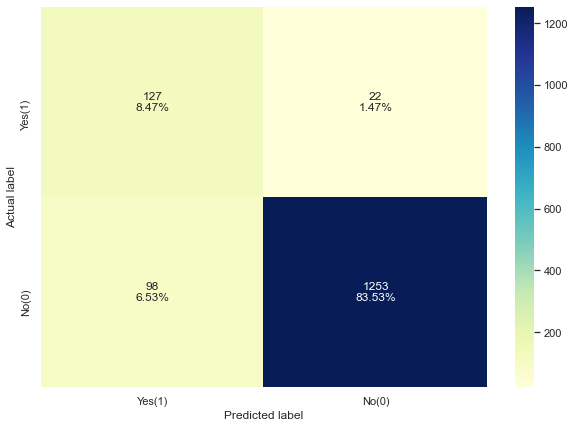

In [82]:
scores_LR = get_metrics_score(lg,x_train,x_test,y_train,y_test,threshold=optimal_threshold_auc_roc,roc=True)
y_predict = np.where(model.predict_proba(x_test)[:,1]>optimal_threshold_auc_roc,1,0)
make_confusion_matrix(y_test,y_predict)

#### 2. Optimal Threshold

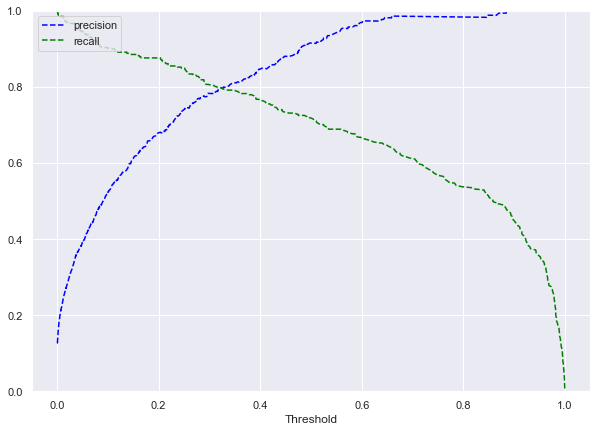

In [83]:
y_scores=lg.predict_proba(x_train)[:,1]
prec, rec, tre = precision_recall_curve(y_train, y_scores,)

def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='precision')
    plt.plot(thresholds, recalls[:-1], 'g--', label = 'recall')
    plt.xlabel('Threshold')
    plt.legend(loc='upper left')
    plt.ylim([0,1])
plt.figure(figsize=(10,7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

Accuracy on training set :  0.9625714285714285
Accuracy on test set :  0.96
Recall on training set :  0.7885196374622356
Recall on test set :  0.7315436241610739
Precision on training set :  0.8105590062111802
Precision on test set :  0.8449612403100775
F1 on training set :  0.7993874425727412
F1 on test set :  0.7841726618705036
ROC-AUC Score on training set :  0.8846353315111746
ROC-AUC Score on test set :  0.8583698875801667


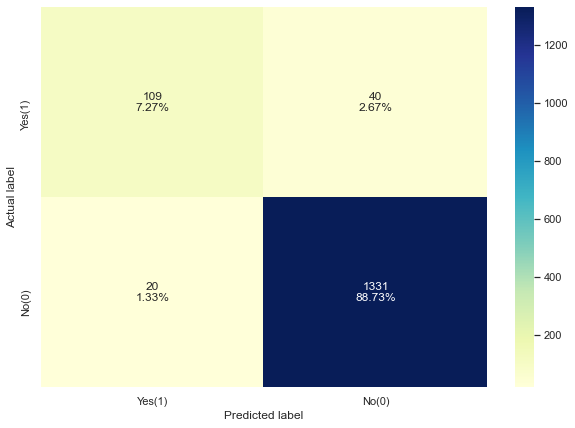

In [84]:
# From the presicion vs recall curve choose the optimal threshold. Usually the point of intersection of the two curve holds
# optimal value. So choose 0.35 as the optimal threshold. 
optimal_threshold_curve = 0.35
scores_LR = get_metrics_score(lg,x_train,x_test,y_train,y_test,threshold=optimal_threshold_curve,roc=True)
y_predict = np.where(model.predict_proba(x_test)[:,1]>optimal_threshold_curve,1,0)
make_confusion_matrix(y_test,y_predict)

#### 3. Sequential Feature Selector

In [85]:
# Sequential feature selector is present in mlxtend library
# !pip install mlxtend to install mlxtent library

from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# to plot the performance with addition of each feature
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

In [86]:
## Defining X and Y variables
X = data.drop(['Personal_Loan'], axis=1)
Y = data['Personal_Loan']

#Convert categorical variables to dummy variables
X = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.30,random_state=1)

In [87]:
#from sklearn.linear_model import LogisticRegression

# Fit the model on train
model = LogisticRegression(solver='newton-cg',n_jobs=-1,random_state=1,max_iter=100)

In [88]:
X_train.shape

(3500, 15)

In [89]:
# we will first build model with all varaible
sfs = SFS(model, k_features=15, forward=True, floating=False, scoring='recall', verbose=2, cv=5,n_jobs=-1)

sfs = sfs.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:    2.3s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    2.4s finished

[2021-06-19 10:05:50] Features: 1/15 -- score: 0.34744459520578924[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  14 | elapsed:    0.4s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  14 out of  14 | elapsed:    0.7s finished

[2021-06-19 10:05:51] Features: 2/15 -- score: 0.5497060153776572[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  13 | elapsed:    0.4s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:    0.8s finished

[2021-06-19 10:05:52] Features: 3/15 -- score: 0.6040705563093622[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  1

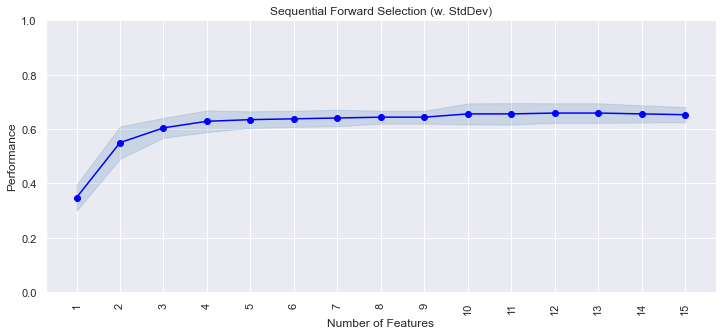

In [90]:
fig1 = plot_sfs(sfs.get_metric_dict(),kind='std_dev',figsize=(12,5))
plt.ylim([0.0, 1])
plt.title('Sequential Forward Selection (w. StdDev)')
plt.xticks(rotation=90)
plt.show()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:    0.4s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.6s finished

[2021-06-19 10:06:06] Features: 1/9 -- score: 0.34744459520578924[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  14 | elapsed:    1.0s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done  14 out of  14 | elapsed:    1.6s finished

[2021-06-19 10:06:08] Features: 2/9 -- score: 0.5497060153776572[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  13 | elapsed:    1.0s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:    1.9s finished

[2021-06-19 10:06:10] Features: 3/9 -- score: 0.6040705563093622[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  12 |

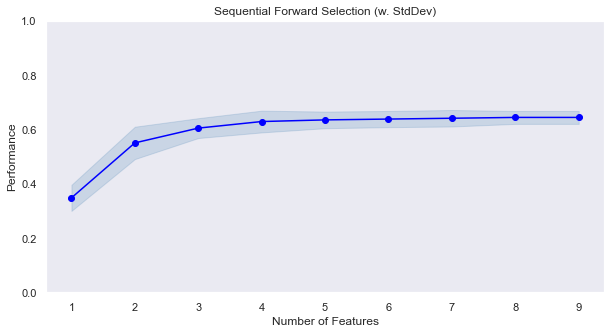

In [91]:
sfs1 = SFS(model, k_features=9, forward=True, floating=False, scoring='recall', verbose=2, cv=5,n_jobs=-1)

sfs1 = sfs1.fit(X_train, y_train)

fig1 = plot_sfs(sfs1.get_metric_dict(),kind='std_dev',figsize=(10,5))

plt.ylim([0.0, 1])
plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()

In [92]:
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

[0, 1, 2, 3, 4, 5, 6, 8, 10]


In [93]:
X_train.columns[feat_cols]

Index(['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Securities_Account', 'Online', 'Region_central'],
      dtype='object')

In [94]:
X_train_final = X_train[X_train.columns[feat_cols]]

#Creating new x_test with the same variables that we selected for x_train
X_test_final = X_test[X_train_final.columns]

In [95]:
X_train_final.shape

(3500, 9)

In [96]:
X_test_final.shape

(1500, 9)

In [97]:
#Fitting logistic regession model

logreg = LogisticRegression(solver='newton-cg',max_iter=1000,penalty='none',verbose=True,n_jobs=-1,random_state=0)

# There are several optimizer, we are using optimizer called as 'newton-cg' with max_iter equal to 10000 
# max_iter indicates number of iteration needed to converge

logreg.fit(X_train_final, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(max_iter=1000, n_jobs=-1, penalty='none', random_state=0,
                   solver='newton-cg', verbose=True)

Accuracy on training set :  0.9517142857142857
Accuracy on test set :  0.9413333333333334
Recall on training set :  0.6404833836858006
Recall on test set :  0.5436241610738255
Precision on training set :  0.8091603053435115
Precision on test set :  0.801980198019802
F1 on training set :  0.715008431703204
F1 on test set :  0.648


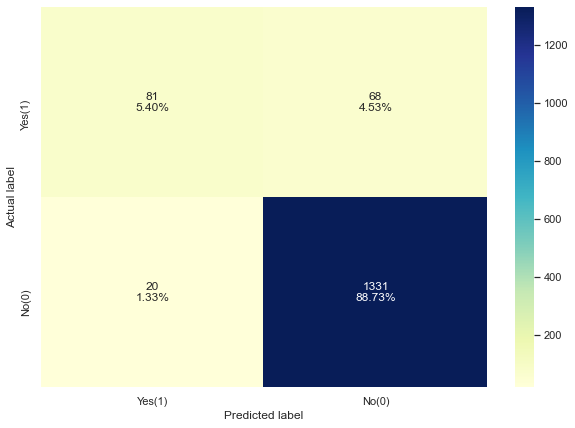

In [98]:
scores_LR = get_metrics_score(logreg,X_train_final,X_test_final,y_train,y_test,flag=True)

# creating confusion matrix
y_predict = logreg.predict(X_test_final)
make_confusion_matrix(y_test,y_predict)

### Logistic Regression: Model Performance Summary


In [99]:
# defining list of model
models = [lg]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_train = []
f1_test = []
# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:
    
    j = get_metrics_score(model,x_train,x_test,y_train,y_test,flag=False)
    k = get_metrics_score(model,x_train,x_test,y_train,y_test,threshold=optimal_threshold_auc_roc,flag=False)
    l = get_metrics_score(model,x_train,x_test,y_train,y_test,threshold=optimal_threshold_curve,flag=False)
    
    #intial model
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])
    f1_train.append(j[6])
    f1_test.append(j[7])
    
    #optimal threshold = 0.77  
    acc_train.append(k[0])
    acc_test.append(k[1])
    recall_train.append(k[2])
    recall_test.append(k[3])
    precision_train.append(k[4])
    precision_test.append(k[5])
    f1_train.append(k[6])
    f1_test.append(k[7])
    
    #optimal threshold = 0.58
    acc_train.append(l[0])
    acc_test.append(l[1])
    recall_train.append(l[2])
    recall_test.append(l[3])
    precision_train.append(l[4])
    precision_test.append(l[5])
    f1_train.append(l[6])
    f1_test.append(l[7])

In [100]:
# defining list of model
models = [logreg]

# looping through all the models list to get the metrics score - Accuracy, Recall, Precision, and F1 score
for model in models:
    
    j = get_metrics_score(model,X_train_final,X_test_final,y_train,y_test,flag=False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])
    f1_train.append(j[6])
    f1_test.append(j[7])

In [101]:
comparison_frame = pd.DataFrame({'Model':['Logistic Regression','Logistic Regression-0.12 Threshold',
                                          'Logistic Regression-0.35 Threshold)','Logistic Regression (SFS - 11 variable)'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test,
                                          'Train_F1_Score':f1_train,'Test_F1_Score':f1_test}) 
comparison_frame

Model  Train_Accuracy  Test_Accuracy  \
0                      Logistic Regression        0.966857       0.958000   
1       Logistic Regression-0.12 Threshold        0.924000       0.920000   
2      Logistic Regression-0.35 Threshold)        0.962571       0.960000   
3  Logistic Regression (SFS - 11 variable)        0.951714       0.941333   

   Train_Recall  Test_Recall  Train_Precision  Test_Precision  Train_F1_Score  \
0      0.716012     0.630872         0.915058        0.921569        0.803390   
1      0.891239     0.852349         0.561905        0.564444        0.689252   
2      0.788520     0.731544         0.810559        0.844961        0.799387   
3      0.640483     0.543624         0.809160        0.801980        0.715008   

   Test_F1_Score  
0       0.749004  
1       0.679144  
2       0.784173  
3       0.648000

### Observations from the different Logistic Regression Model: 

#### 1. Default Logistic model: 

* The model has best accuracy, precision and decent F1 Score but the recall score is not that great.

#### 2. Logistic Regression with 0.12 Threshold ROC-AUC: 

* Though Acurracy of the model has dropped, Recall rate are better and both test & train data scores don't show much difference. Precision has dropped so do the F1 score

#### 3. Logistic Regression with Optimal Threshold of 0.35: 

* Acurracy is better, recall score is decent but not better than the 0.12 model. 

#### 4. Logistic Regression ( SFS) 

* Acurrancy of the model is better, but the recall score is not that good. 
        
Based on the above metrics, it is evident that the model from 0.12 threshold is the best of the Logistic regression with recall score of 85% & 89%  (test & Train) and False Negative of 22 predictions. 

Let me compare the model from decision tree also, become confirming which is the best model for AllLifeBank

# 4. Decision Tree Classification

In [102]:
## Importing the necessary decision tree libraries. 
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

I follow the *_dt* for all the variables, as this has caused my notbook errors when i rerun the codes in the logistic regression after running the decision algorithms. 

In [103]:
X_dt= data.drop('Personal_Loan', axis=1)
y_dt= data["Personal_Loan"]

In [104]:
#X = pd.get_dummies(X,drop_first=True)
def encode_cat_vars(x):
    x = pd.get_dummies(
        x,
        columns=x.select_dtypes(include=["object", "category"]).columns.tolist(),
        drop_first=True,
    )
    return x


X_dt = encode_cat_vars(ind_vars)

In [105]:
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X_dt,y_dt, test_size=0.3, random_state=1)
print(X_train_dt.shape, X_test_dt.shape)

(3500, 15) (1500, 15)


* Build the model using the DecisionTreeClassifier function. Using default 'gini' criteria to split. 
* The model is highly imbalanced, means Personal Loan not bouught (0) has 90% of customer bases, whereas the target class of 1 is just 10 %

* In this case, class_weight can be used {0:0.15,1:0.85} to the model to specify the weight of each class and the decision tree will give more weightage to class 1.

* class_weight is a hyperparameter for the decision tree classifier.

### 4.1 DT - Default Model Creation

In [106]:
model = DecisionTreeClassifier(criterion="gini", class_weight={0:0.15, 1:0.85}, random_state=1)

In [107]:
model.fit(X_train_dt, y_train_dt)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, random_state=1)

In [108]:
##  Function to calculate recall score
def get_recall_score1(model):
    """
    model : classifier to predict values of X

    """
    pred_train_dt = model.predict(X_train_dt)
    pred_test_dt = model.predict(X_test_dt)
    print("Recall on training set : ", metrics.recall_score(y_train_dt, pred_train_dt))
    print("Recall on test set : ", metrics.recall_score(y_test_dt, pred_test_dt))

In [109]:
def get_recall_score(model):
    '''
    model : classifier to predict values of X

    '''
    ytrain_predict = model.predict(X_train_dt)
    ytest_predict = model.predict(X_test_dt)
    # accuracy on training set
    print("Accuracy : Train : ", 
          model.score(X_train_dt,y_train_dt),
          " Test: ", 
          model.score(X_test_dt,y_test_dt))
# accuracy on training set
    print("Recall   : Train : ", 
          metrics.recall_score(y_train_dt,ytrain_predict),
          " Test: ", 
          metrics.recall_score(y_test_dt,ytest_predict))
    #make_confusion_matrix(y_train_dt,ytrain_predict,"Confusion Matric on Train Data")
    make_confusion_matrix(y_test_dt,ytest_predict)

Accuracy : Train :  1.0  Test:  0.9793333333333333
Recall   : Train :  1.0  Test:  0.8791946308724832


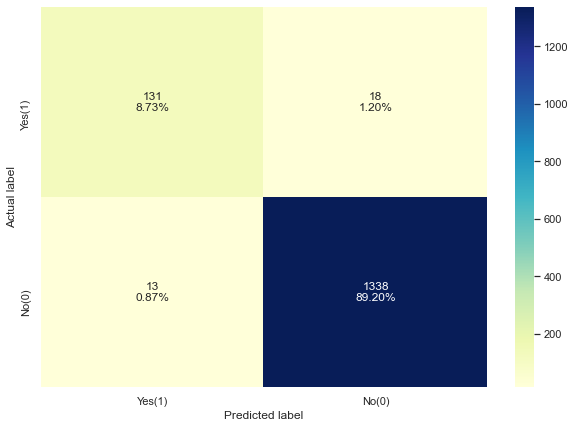

In [110]:
get_recall_score(model)
#y_predict_dt = model.predict(X_test_dt)
#make_confusion_matrix(y_test_dt, y_predict_dt)

In [111]:
y_train_dt.value_counts(1)

0    0.905429
1    0.094571
Name: Personal_Loan, dtype: float64

* There is a huge disparity in performance of model on training set and test set, which suggests that the model is overfiiting.

### 4.1.1 DT - Defaul Model Visuzalisation


In [112]:
column_names = list(X_dt.columns)
  # Keep only names of features by removing the name of target variable
feature_names = column_names
print(feature_names)

['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'Region_central', 'Region_central_coast', 'Region_far_southern', 'Region_northern', 'Region_southern']


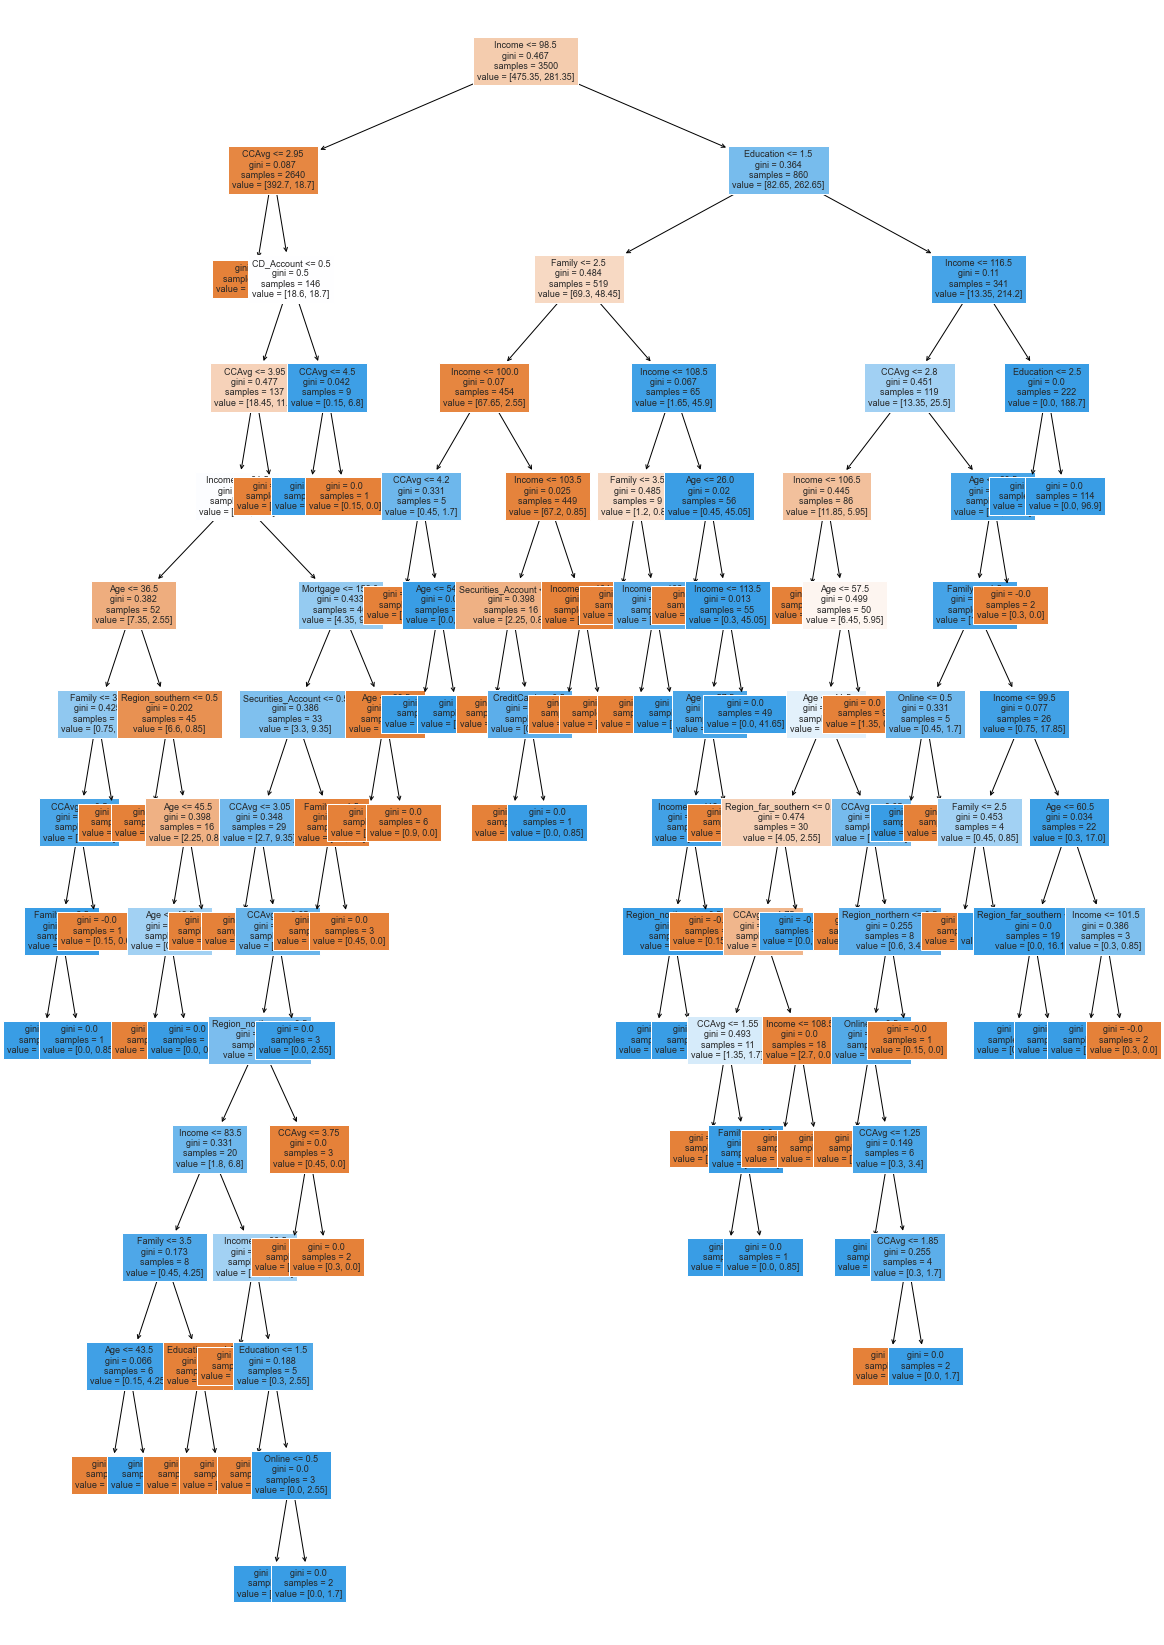

In [113]:
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [114]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model, feature_names=feature_names, show_weights=True))

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [374.10, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- CCAvg <= 3.95
|   |   |   |   |--- Income <= 81.50
|   |   |   |   |   |--- Age <= 36.50
|   |   |   |   |   |   |--- Family <= 3.50
|   |   |   |   |   |   |   |--- CCAvg <= 3.50
|   |   |   |   |   |   |   |   |--- Family <= 2.50
|   |   |   |   |   |   |   |   |   |--- weights: [0.00, 0.85] class: 1
|   |   |   |   |   |   |   |   |--- Family >  2.50
|   |   |   |   |   |   |   |   |   |--- weights: [0.00, 0.85] class: 1
|   |   |   |   |   |   |   |--- CCAvg >  3.50
|   |   |   |   |   |   |   |   |--- weights: [0.15, 0.00] class: 0
|   |   |   |   |   |   |--- Family >  3.50
|   |   |   |   |   |   |   |--- weights: [0.60, 0.00] class: 0
|   |   |   |   |   |--- Age >  36.50
|   |   |   |   |   |   |--- Region_southern <= 0.50
|   |   |   |   |   |   |   |--- weights: [4.35, 0.00] class: 0
|   |   |   |   |   |   |--- Reg

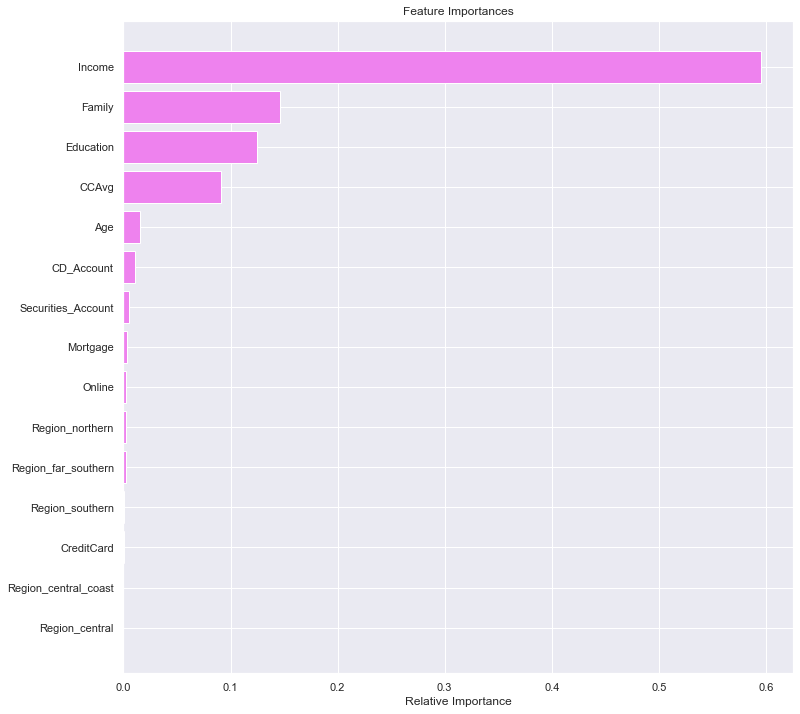

In [115]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* According to the decision tree model, Income is the most important variable for predicting the Eligibale customer for the loan.

## 4.2 DT - Hyperparameter tuning

### Reducing over fitting


#### Using GridSearch for Hyperparameter tuning of our tree model

* Hyperparameter tuning is also tricky in the sense that there is no direct way to calculate how a change in the
  hyperparameter value will reduce the loss of your model, so we usually resort to experimentation. i.e we'll use Grid search
* Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters. 
* It is an exhaustive search that is performed on a the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

In [116]:
from sklearn.model_selection import GridSearchCV

In [117]:
###### Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight={0: 0.15, 1: 0.85})

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(1, 10),
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],
    "min_impurity_decrease": [0.000001, 0.00001, 0.0001],
    "max_features": ["log2", "sqrt"],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train_dt, y_train_dt)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train_dt, y_train_dt)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, criterion='entropy',
                       max_depth=3, max_features='log2',
                       min_impurity_decrease=1e-06, random_state=1)

In [118]:
#y_predict_dt = estimator.predict(X_test_dt)
#make_confusion_matrix(y_test_dt, y_predict_dt)

Accuracy : Train :  0.8037142857142857  Test:  0.7953333333333333
Recall   : Train :  0.9395770392749244  Test:  0.9328859060402684


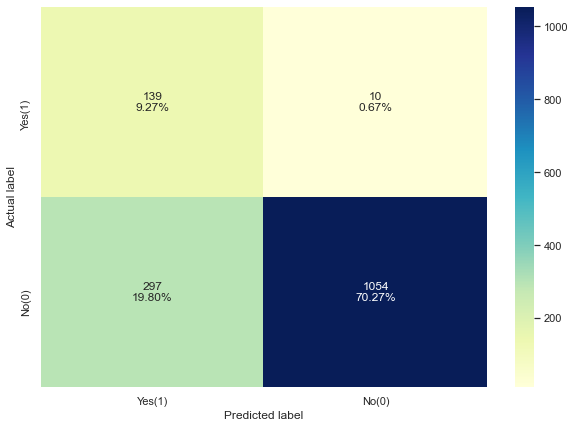

In [119]:
get_recall_score(estimator)

### 4.2.1 DT - Hyperparameter Model Visualization

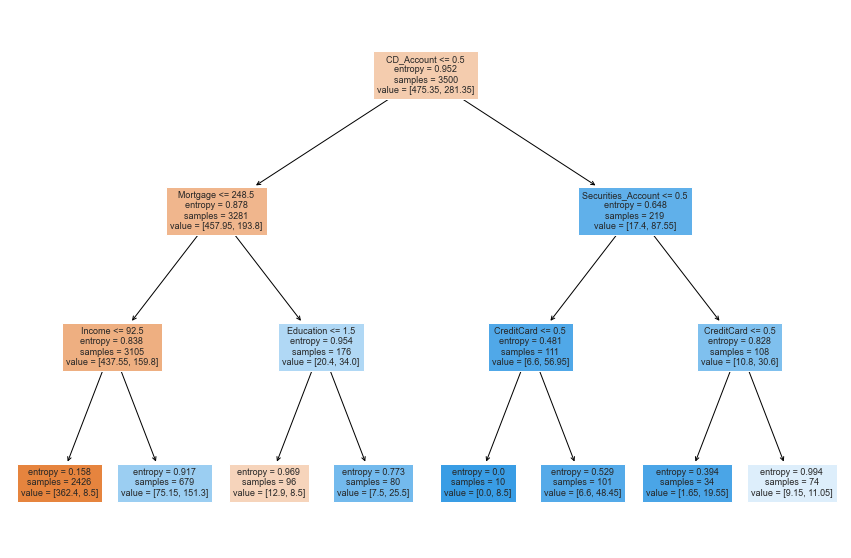

In [120]:
plt.figure(figsize=(15, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [121]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        estimator.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

# Here we will see that importance of features has increased

                           Imp
Income                0.668830
CD_Account            0.228646
Mortgage              0.056568
CreditCard            0.020816
Education             0.016151
Securities_Account    0.008989
Age                   0.000000
Family                0.000000
CCAvg                 0.000000
Online                0.000000
Region_central        0.000000
Region_central_coast  0.000000
Region_far_southern   0.000000
Region_northern       0.000000
Region_southern       0.000000


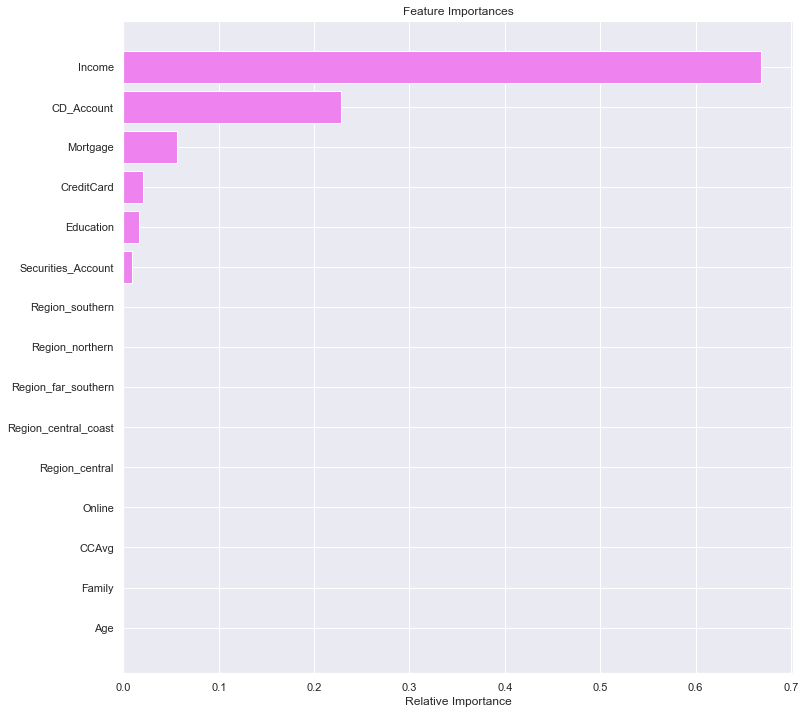

In [122]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* With HyperParameter criterion='entropy',max_depth=9, max_features='log2' the overfitting on train has reduced, but the recall for test has not improved. 

#### I think by tuning the paramaters can yeild the better results. But for now, will check post-pruning method also. 


* Important features are Income,Education 2 and Education 3, Family 4, Family 3, CCavg & Age.
* But the recall metric is still 72 and false negatives are 41.We don't want to loose opportunity in predicting this customers. so Let see if instead of pre pruning , post pruning helps in reducing false negative.

## 4.3 DT - Post-Pruning Model

### Cost Complexity Pruning

we train a decision tree using the effective alphas. We will set these values of alpha and pass it to the ccp_alpha parameter of our DecisionTreeClassifier. By looping over the alphas array, we will find the accuracy on both Train and Test parts of our dataset.

In [123]:
clf = DecisionTreeClassifier(random_state=1, class_weight={0: 0.15, 1: 0.85})
#clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train_dt, y_train_dt)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

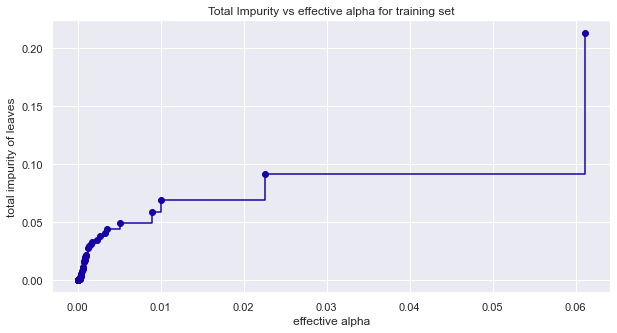

In [124]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [125]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight={0: 0.15, 1: 0.85}
    )
    clf.fit(X_train_dt, y_train_dt)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.2537957148948099


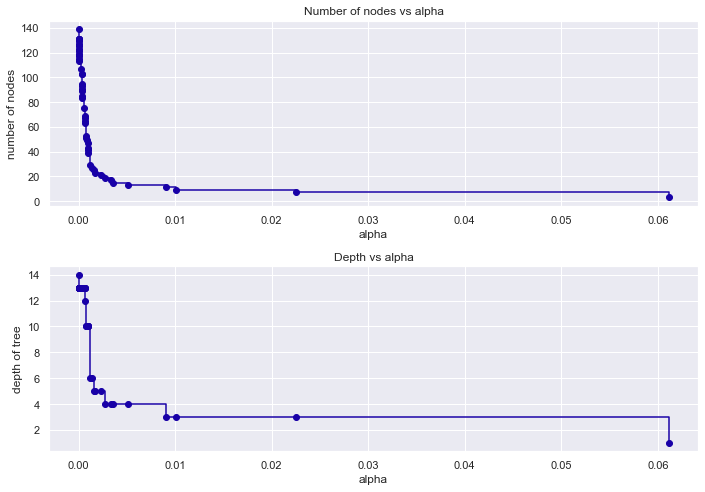

In [126]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [127]:
recall_train = []
for clf in clfs:
    pred_train3 = clf.predict(X_train_dt)
    values_train = metrics.recall_score(y_train_dt, pred_train3)
    recall_train.append(values_train)

In [128]:
recall_test = []
for clf in clfs:
    pred_test3 = clf.predict(X_test_dt)
    values_test = metrics.recall_score(y_test_dt, pred_test3)
    recall_test.append(values_test)

In [129]:
train_scores = [clf.score(X_train_dt, y_train_dt) for clf in clfs]
test_scores = [clf.score(X_test_dt, y_test_dt) for clf in clfs]

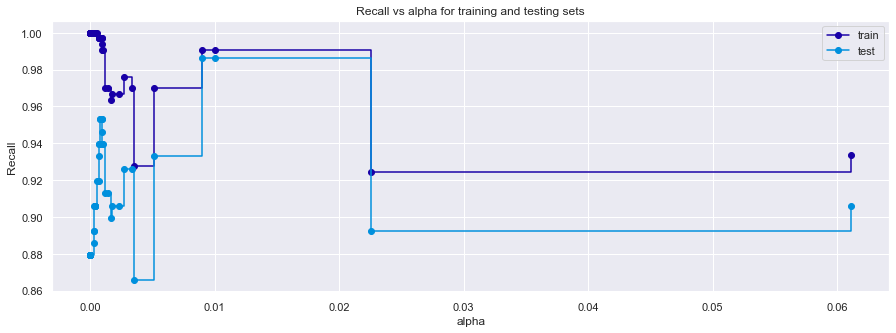

In [130]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(
    ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

We are gettingt a higher recall on test data between 0.009 to 0.022. Will choose alpha as 0.01.

**Creating model with 0.01 ccp_alpha**

In [131]:
best_model2 = DecisionTreeClassifier(
    ccp_alpha=0.01, class_weight={0: 0.15, 1: 0.85}, random_state=1
)
best_model2.fit(X_train_dt, y_train_dt)

DecisionTreeClassifier(ccp_alpha=0.01, class_weight={0: 0.15, 1: 0.85},
                       random_state=1)

In [132]:
#make_confusion_matrix(best_model2, y_test)
#y_predict_dt = best_model2.predict(X_test_dt)
#make_confusion_matrix(y_test_dt, y_predict_dt)

Accuracy : Train :  0.9351428571428572  Test:  0.9393333333333334
Recall   : Train :  0.9909365558912386  Test:  0.9865771812080537


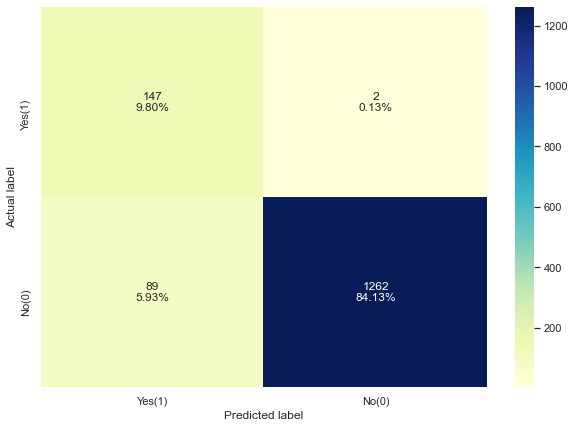

In [133]:
get_recall_score(best_model2)

### 4.3.1 DT Post Pruning Model Visualization

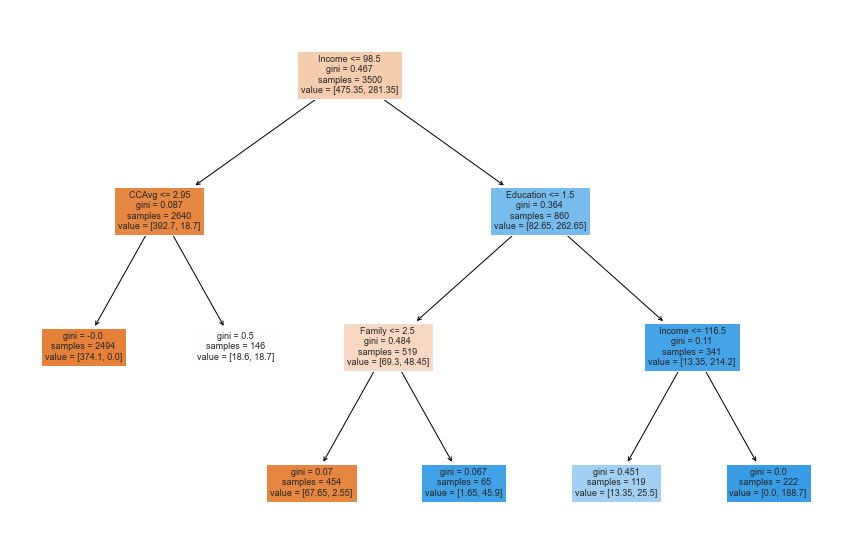

In [134]:
plt.figure(figsize=(15, 10))

out = tree.plot_tree(
    best_model2,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

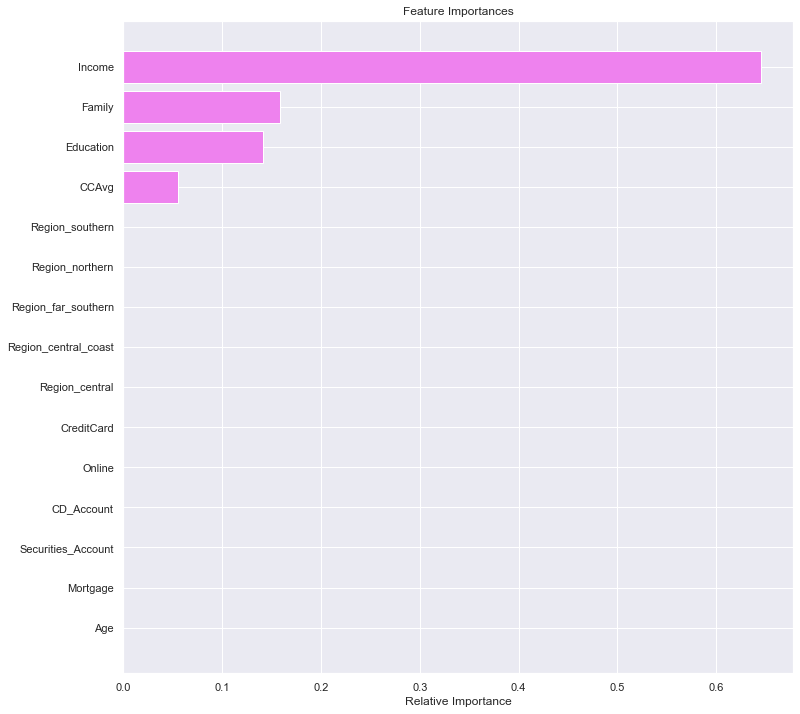

In [135]:
importances = best_model2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* We are getting a higher recall on test data between 0.009 to 0.022. Will choosed alpha as 0.01.
* The Recall on train and test indicate we have created a generalized model. with 98 % accuracy and reduced False negatives.
* Important features : Income, Graduate education, Family member 3 and 4, Ccavg, Advanced education, Age.
* This is the best model as false negative is only 2 on Testdata.

### 4.4 Comparing the Decision Tree Model Performance

In [136]:
comparison_frame = pd.DataFrame({'Model':['Initial decision tree model',
                                          'Decision treee with hyperparameter tuning',
                                          'Decision tree with post-pruning'], 
                                          'Train_accuracy':[1,0.83,0.93],
                                          'Test_accuracy':[0.98,0.82,0.94],
                                          'Train_Recall':[1,0.81,0.99], 
                                          'Test_Recall':[0.88,0.72,0.98],
                                          'False Negative':[18,10,2],
                                          'False Negative %':[1.20,0.67,0.13]})  

comparison_frame

Model  Train_accuracy  Test_accuracy  \
0                Initial decision tree model            1.00           0.98   
1  Decision treee with hyperparameter tuning            0.83           0.82   
2            Decision tree with post-pruning            0.93           0.94   

   Train_Recall  Test_Recall  False Negative  False Negative %  
0          1.00         0.88              18              1.20  
1          0.81         0.72              10              0.67  
2          0.99         0.98               2              0.13

#### Default Model

* Default model has high accuracy but the recall is not so good. The false negative for this model remains at 18 and the model is overfitting. 

#### Hyperparameter tuning: 

* HyperWith HyperParameter criterion='entropy',max_depth=9, max_features='log2' the overfitting on train has reduced, but the recall for test has not improved.
* Important features are Income,Education 2 and Education 3, Family 4, Family 3, CCavg & Age.
* But the recall metric is still 72 and false negatives are 41.We don't want to loose opportunity in predicting this customers. so Let see if instead of pre pruning , post pruning helps in reducing false negative.

#### Post Pruning:

* The Recall on train and test indicate we have created a generalized model. with 98 % accuracy and reduced False negatives.
* We are getting a higher recall on test data between 0.009 to 0.022. Will choosed alpha as 0.01.
* The Recall on train and test indicate we have created a generalized model. with 98 % accuracy and reduced False negatives.
* Important features : Income, Graduate education, Family member 3 and 4, Ccavg, Advanced education, Age.
* This is the best model as false negative is only 2 on Testdata*.


## Compare the best models from Logistic Regression and Decision Tree algorithms

Choose the best models from each algorithms and make an comparions. For the given dataset, the best model for Logistic regression is the one with Optimal threshold of 0.12 and for decision tree it is the post pruning model. 

In [137]:
comparison_frame = pd.DataFrame({'Algorithm':['Logistics Regression',
                                          'Decision tree'], 'Model':['Optimal Threshold ROC AUC 0.12',"Post-Pruning"],
                                          'Train_accuracy':[0.924,0.93],
                                          'Test_accuracy':[0.92,0.94],
                                          'Train_Recall':[0.78,0.99], 
                                          'Test_Recall':[0.73,0.98],
                                          'False Negative':[22,2],
                                          'False Negative %':[1.47,0.13]}) 

In [138]:
comparison_frame

Algorithm                           Model  Train_accuracy  \
0  Logistics Regression  Optimal Threshold ROC AUC 0.12           0.924   
1         Decision tree                    Post-Pruning           0.930   

   Test_accuracy  Train_Recall  Test_Recall  False Negative  False Negative %  
0           0.92          0.78         0.73              22              1.47  
1           0.94          0.99         0.98               2              0.13

For the give business scenario, recall is the best indicator to chose which model is best. The decision tree with post-pruning has the Recall on train and test indicate we have created a generalized model. with 98 % accuracy and reduced False negatives to just 2 from the test data. Hence the Decision Tree with the post-pruning is the ideal model for the given data set and the result from this model can be used by the marketing team to get the traget customer list. 


# 6. Perform an Exploratory Data Analysis on the incorrectly predicted data

#### - Do an analysis of all the incorrectly predicted or misclassified samples ( Eg: original label = 0 but model predicted it as 1) 
#### - Perform EDA on such points to see if there is a pattern

##### Steps:

- From the best model, need to compare the y_test and y_predict data. 

In [139]:
final_model = DecisionTreeClassifier(
    ccp_alpha=0.01, class_weight={0: 0.15, 1: 0.85}, random_state=1
)
final_model.fit(X_train_dt, y_train_dt)

DecisionTreeClassifier(ccp_alpha=0.01, class_weight={0: 0.15, 1: 0.85},
                       random_state=1)

Accuracy : Train :  0.9351428571428572  Test:  0.9393333333333334
Recall   : Train :  0.9909365558912386  Test:  0.9865771812080537


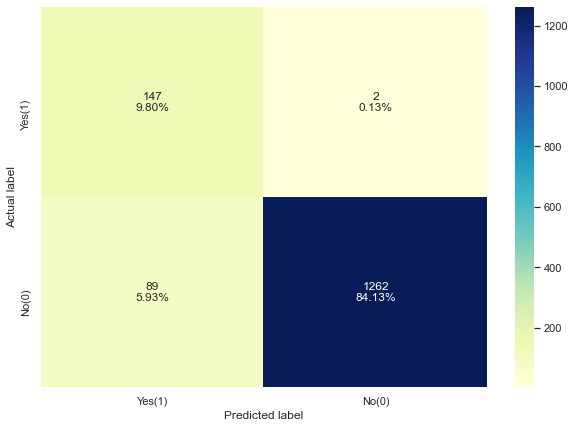

In [140]:
get_recall_score(best_model2)

#### Model results tells there are total of 91 customers has been miscalcualted. 

- False Negative(Recall) - 2 customers
- False Positives(Precision) - 89 customers

For further analysis of the why we get these many miscalculation, i will be making use of test data( Independent and dependent) & predicated data. 

In [141]:
y_test_predict_dt= final_model.predict(X_test_dt)

In [142]:
# Cycle through each element in the lists and retun a boolean array denoting whether a prediction was correct or not
correct = [pred==true for pred, true in zip(y_test_predict_dt, y_test_dt)] 

In [143]:
# Add new column(Correct) to the X_test_dt df 
X_test_dt['Correct'] = [pred==true for pred, true in zip(y_test_predict_dt, y_test_dt)]

In [144]:
X_test_dt

Age  Income  Family  CCAvg  Education  Mortgage  Securities_Account  \
2764   31    84.0       1   2.90          3     105.0                   0   
4767   35    45.0       3   0.90          1     101.0                   1   
3814   34    35.0       3   1.30          1       0.0                   0   
3499   49   114.0       1   0.30          1     252.5                   0   
2735   36    70.0       3   2.60          2     165.0                   0   
...   ...     ...     ...    ...        ...       ...                 ...   
4140   63    32.0       1   1.50          2       0.0                   0   
3969   38    75.0       3   2.33          2       0.0                   0   
2535   50    21.0       2   0.70          3     129.0                   0   
1361   50    38.0       4   0.90          2       0.0                   0   
1458   51    33.0       1   1.40          3       0.0                   0   

      CD_Account  Online  CreditCard  Region_central  Region_central_coast  \
2764           0       0           1               0                     1   
4767           0       0           0               0                     0   
3814           0       0           0               0                     0   
3499           0       1           0               0                     0   
2735           0       1           0               0                     0   
...          ...     ...         ...             ...                   ...   
4140           0       0           0               0                     0   
3969           0       1           0               0                     0   
2535           0       0           0               0                     0   
1361           0       1           0               0                     1   
1458           0       1           1               0                     1   

      Region_far_southern  Region_northern  Region_southern  Correct  
2764                    0                0                0     True  
4767                    0                0                1     True  
3814                    0                0                0     True  
3499                    0                0                0     True  
2735                    1                0                0     True  
...                   ...              ...              ...      ...  
4140                    0                0                0     True  
3969                    0                0                0     True  
2535                    0                0                1     True  
1361                    0                0                0     True  
1458                    0                0                0     True  

[1500 rows x 16 columns]

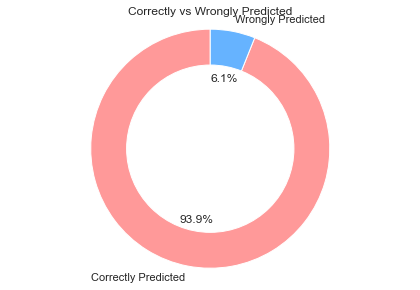

In [145]:
#plt.pie(data=X_test_dt,x=X_test_dt["Correct"].value_counts(),autopct='%1.1f%%',color='Set2')


colors = ['#ff9999','#66b3ff']
 
fig1, ax1 = plt.subplots()
ax1.pie(data=X_test_dt,x=X_test_dt["Correct"].value_counts(),labels=['Correctly Predicted','Wrongly Predicted'],colors = colors, autopct='%1.1f%%', startangle=90)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.title('Correctly vs Wrongly Predicted')
plt.show()


Here we will focus on those 6.1% of the 1500 customers, why the model has predicted wrongly. Below segmentation will reveal additional insights

Create a dataframe using X_test_dt, y_test_dt and _y_test_predict_dt

In [146]:
incDF = X_test_dt.copy()

In [147]:
incDF["Actual"] = y_test_dt

In [148]:
incDF['Predicted'] = y_test_predict_dt

In [149]:
incDF

Age  Income  Family  CCAvg  Education  Mortgage  Securities_Account  \
2764   31    84.0       1   2.90          3     105.0                   0   
4767   35    45.0       3   0.90          1     101.0                   1   
3814   34    35.0       3   1.30          1       0.0                   0   
3499   49   114.0       1   0.30          1     252.5                   0   
2735   36    70.0       3   2.60          2     165.0                   0   
...   ...     ...     ...    ...        ...       ...                 ...   
4140   63    32.0       1   1.50          2       0.0                   0   
3969   38    75.0       3   2.33          2       0.0                   0   
2535   50    21.0       2   0.70          3     129.0                   0   
1361   50    38.0       4   0.90          2       0.0                   0   
1458   51    33.0       1   1.40          3       0.0                   0   

      CD_Account  Online  CreditCard  Region_central  Region_central_coast  \
2764           0       0           1               0                     1   
4767           0       0           0               0                     0   
3814           0       0           0               0                     0   
3499           0       1           0               0                     0   
2735           0       1           0               0                     0   
...          ...     ...         ...             ...                   ...   
4140           0       0           0               0                     0   
3969           0       1           0               0                     0   
2535           0       0           0               0                     0   
1361           0       1           0               0                     1   
1458           0       1           1               0                     1   

      Region_far_southern  Region_northern  Region_southern  Correct  Actual  \
2764                    0                0                0     True       0   
4767                    0                0                1     True       0   
3814                    0                0                0     True       0   
3499                    0                0                0     True       0   
2735                    1                0                0     True       0   
...                   ...              ...              ...      ...     ...   
4140                    0                0                0     True       0   
3969                    0                0                0     True       0   
2535                    0                0                1     True       0   
1361                    0                0                0     True       0   
1458                    0                0                0     True       0   

      Predicted  
2764          0  
4767          0  
3814          0  
3499          0  
2735          0  
...         ...  
4140          0  
3969          0  
2535          0  
1361          0  
1458          0  

[1500 rows x 18 columns]

## Get the Actual and Predicted segmantation and also with correct & wrong predicted segment

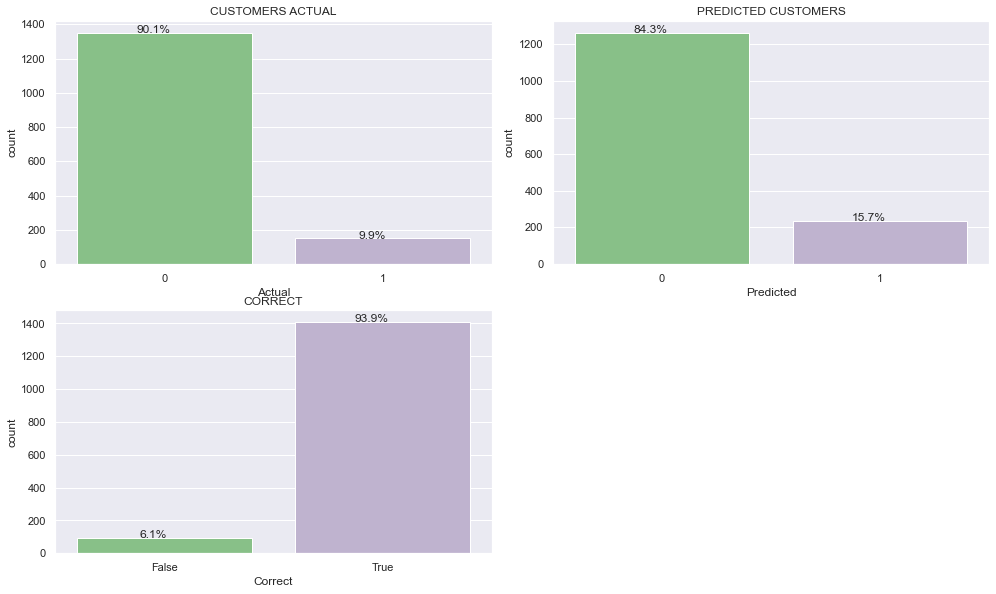

In [150]:
title=['Customers Actual','Predicted Customers','Correct']

cols = incDF[
    [
        "Actual",
        "Predicted",
        "Correct"
    ]
].columns.tolist()
plt.figure(figsize=(14, 20))

for i, variable in enumerate(cols):
    plt.subplot(5, 2, i + 1)
    order = incDF[variable].value_counts(ascending=False).index   
    ax=sns.countplot(incDF[variable],palette='Accent')
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/len(incDF[variable]))
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        plt.annotate(percentage, (x, y),ha='center')
    plt.tight_layout()
    plt.title(title[i].upper())
plt.show()

Segmentaions confirms model has predicted better more than the actual customers who intend/bought the loan. So this should be as there will be not be much impact on the revenue to be spend on converting those customers to buy the loan

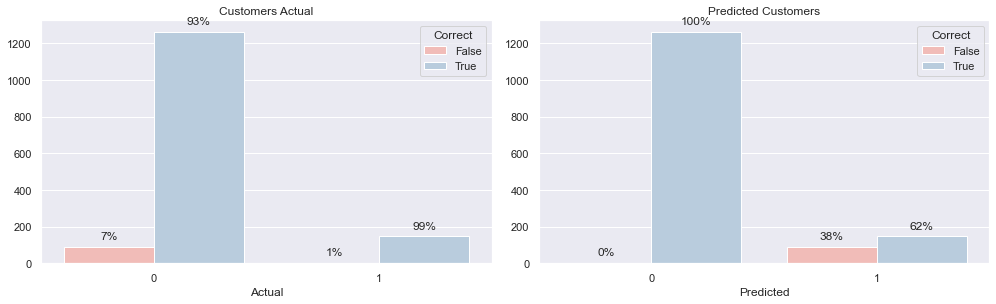

In [151]:
title=['Customers Actual','Predicted Customers']

cols = incDF[
    [
        "Actual",
        "Predicted"
    ]
].columns.tolist()
plt.figure(figsize=(14, 20))

for i, variable in enumerate(cols):
    plt.subplot(5, 2, i + 1)
    ax=sns.countplot(incDF[variable],hue=incDF["Correct"],palette='Pastel1')
    ax.set_ylabel('')
    bars = ax.patches
    half = int(len(bars)/2)
    left_bars = bars[:half]
    right_bars = bars[half:]

    for left, right in zip(left_bars, right_bars):
        height_l = left.get_height()
        height_r = right.get_height()
        total = height_l + height_r

        ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center")
        ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")
    plt.tight_layout()
    plt.title(title[i])
plt.show()

## Analysis of False Negative customers : 

Condition: Actual = 1, Predicted = 0

In [152]:
falseNeg_customes = incDF[(incDF['Actual'] == 1) & (incDF['Predicted'] == 0)]
falseNeg_customes

Age  Income  Family  CCAvg  Education  Mortgage  Securities_Account  \
322    63   101.0       1    3.9          1       0.0                   1   
1126   32   104.0       2    3.7          1       0.0                   0   

      CD_Account  Online  CreditCard  Region_central  Region_central_coast  \
322            1       1           0               0                     0   
1126           0       0           1               0                     0   

      Region_far_southern  Region_northern  Region_southern  Correct  Actual  \
322                     1                0                0    False       1   
1126                    0                0                0    False       1   

      Predicted  
322           0  
1126          0

### The reason for these customers predicted as negative is these two customes doesn't fall in the higher income group, education is undergraduate degree and ccavg is in the lower bracket

## Analysis of False Positive Customers: 

Condition: Actual = 0, Predicted = 1

In [153]:
falsePos_customes = incDF[(incDF['Actual'] == 0) & (incDF['Predicted'] == 1)]
falsePos_customes

Age  Income  Family  CCAvg  Education  Mortgage  Securities_Account  \
932    51   112.0       3    1.8          2       0.0                   1   
792    41    98.0       1    4.0          3       0.0                   0   
2982   59   111.0       3    4.4          1       0.0                   0   
3420   66   114.0       1    0.8          3       0.0                   0   
3144   43   104.0       3    1.0          1       0.0                   0   
4868   51    62.0       2    3.2          3     118.0                   0   
3741   53    51.0       2    3.2          3       0.0                   0   
3501   65   105.0       4    1.7          3       0.0                   1   
3990   57    59.0       2    3.7          1     134.0                   0   
169    27   112.0       4    2.1          3       0.0                   0   
3067   31   101.0       1    2.9          3     170.0                   1   
4065   44    68.0       1    3.7          3       0.0                   0   
3277   43    81.0       2    3.2          1       0.0                   0   
4442   48    62.0       4    3.6          3      83.0                   0   
729    58    90.0       1    3.0          3       0.0                   0   
1333   62    99.0       4    1.7          2       0.0                   0   
3630   41    79.0       1    4.0          3     225.0                   0   
1941   43    58.0       2    3.2          1       0.0                   0   
836    42    74.0       3    3.0          1       0.0                   0   
2762   56    65.0       2    3.7          1       0.0                   0   
1074   39    75.0       3    3.0          1       0.0                   0   
3792   62   109.0       4    1.7          3       0.0                   0   
3708   31    74.0       4    4.0          3       0.0                   0   
12     48   114.0       2    3.8          3       0.0                   1   
222    26   104.0       3    2.5          1       0.0                   0   
3735   40    78.0       1    5.2          1       0.0                   0   
394    33    80.0       4    3.4          1       0.0                   0   
3409   29   113.0       2    2.0          2      84.0                   0   
4392   52    81.0       4    3.8          2       0.0                   0   
4554   41   109.0       3    1.0          1       0.0                   1   
2351   55    74.0       2    3.2          3       0.0                   0   
2685   28   101.0       4    2.1          3       0.0                   0   
1875   27   112.0       3    2.5          1     252.5                   1   
3023   63   105.0       4    1.7          3     244.0                   0   
3274   31   110.0       2    1.5          3       0.0                   0   
1909   56   101.0       3    1.7          2       0.0                   0   
4327   30   102.0       4    2.1          3     139.0                   0   
4904   64    88.0       1    3.8          1     243.0                   0   
82     41    82.0       1    4.0          3       0.0                   0   
1565   34   104.0       3    1.2          3       0.0                   0   
190    60    93.0       1    4.3          1       0.0                   0   
587    50    94.0       1    4.9          1     252.5                   0   
486    55    84.0       2    3.7          1     252.5                   1   
4229   54    83.0       1    3.0          3       0.0                   0   
4571   58    95.0       1    3.0          3       0.0                   0   
256    26    99.0       4    2.3          3       0.0                   0   
2098   59    94.0       1    3.8          1     252.5                   0   
1523   41   104.0       1    1.0          3       0.0                   0   
2854   49    79.0       4    3.6          3     212.0                   0   
1147   37   111.0       1    0.8          2       0.0                   0   
3730   30   112.0       3    2.5          1       0.0                   0   
10

Skimming on the data shows these customers have either family of 2-3 members, graduate level education and higher mortgage. And looks like most of them fall under the middle income group. Hence the model might have predicted them as a potential customers to be targeted by the marketing team. 

# Final - Recommendations to the Bank's Marketing Team:

After analysing the give loan data using EDA, and evaluating the best models from logistic regression and decision tree to build the likeliness of the customer buying a loan or not, came up with following recommendations to the marketing team.

* Income is the top most criteria to predict the customer will take a loan or not. 
* Addition to Income, customers with graduate & adv gradudate degrees and family size of 3 or above have high chance of buying the loans.
* Marketting team can focus the big cities from the Southern, Central Costal and Bay area regions. 
* Focussed on Recall as the performence metrics to get the best model. Reason for choosing recall as the key metrics is that marketing team will be focusing on to add in more customers to take the loan. In this case if not identifying the potential customer is a big loss. So reducing the number of false negatives predictions. 
* From both the algorithms we can see the most important variables for the classifications are Income, Education, CCAvg, Family and CD account. Mortgage also has some impact to the prediction. 
* Using the logistic regression, the coffecient of the variables were found and observed the increase coeffecients of Income, education ( grad & advanced) , Family(3 & 4) , CCAvg, Mortgage are possitive which means one unit increase in these will increase the chance of the customer to take the loan. 
* Negative coffecients were found for the variable Euducation(2), Online, Security_account, family(2) and some regions. Increase in such value tend to decrease the chance of taking the loan. 
* In general, customer having high income group ( over 100 K ) with graduate/advance prof and with family member of 3 & above are the first choice for the marketing team to focus. They tend to purchase the loan at higher rate compared to other income group. 
* Based on EDA, classifcation models observed that the customers having high credit card spending (CCAvg) and mortage could be a another segment of people who perfer to buy the loan
* Given data has been segmented into meaningfull groups like High profile, medium profile and low profile. The segmentation used Income, education, family size, cc spending as the key variables. 
* The final recommendation for the marketing team is to focus on the high profile customers first and then move towards medium and lower segment groups. 


